In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np

<b>Problem Statement:</b> A bank manager is troubled with customers quitting on credit card services. To solve this issue they need to predict who are most likely to quit so that they can be proactively provided with better services and have their decisions changed.

<b>Project Aim</b>

1. Making a model to find Probability of a person to churn

2. Identifying the causes of a person churning. Which further helps bank in making proper improvements and offers for that person

<b> Why probability ?</b>

* It helps bank in better decision making and providing with better retention strategies.
* Probabaility of churn provides with better insights into how likely is it fo a customer to churn.

<b> Benefits of Project</b>
* Improved Customer Experience
* Improved Customer Retention
* Revenue Protection
* Well Targeted Marketing
* Reduced Marketing costs
* Better designing of marketing Plan

In [2]:
df = pd.read_csv('../data/BankChurners.csv')

In [3]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

<b>1. CLIENTNUM --</b> Unique User ID -- Categorical nominal  

<b>2. Attrition_Flag --</b> has person churned or not, Attrited if churned -- Categorical nominal

<b>3. Customer_Age --</b> age of person in years -- Numeric Discrete

<b>4. Gender --</b> M if Male, F if female -- Categorical Nominal

<b>5. Dependent_Count --</b> Number of dependents on the person -- Numeric Discrete

<b>6. Education_Level --</b> Level of eduction of person(like High School, Graduate & etc.) -- Education Level of few people is unknown -- Categorical ordinal

<b>7. Marital_Status --</b> Married/Single/Divorced status of person -- Marital status of few people is unknown -- Categorical nominal

<b>8. Income_Category --</b> Income group for 0-40K to 120k+ , 6 categories -- income category of few people is unknown -- Categorical Ordinal

<b>9. Card_Category --</b> The type of card out of 4 offered to a person -- Catgorical Nominal

<b>10. Months_on_book --</b> Duration in months since person has card -- Numeric Discrete

<b>11. Total_Relationship_Count --</b> No. of products of bank being used by person -- Numeric Discrete

<b>12. Months_Inactive_12_mon --</b> No. of months inactive in last 12 months  -- Numeric Discrete

<b>13. Contacts_Count_12_mon --</b> No. of contacts made with bank in past 12 months -- Numeric Discrete

<b>14. Credit_Limit --</b> Credit Limit of Credit Card --  Numeric Continuous

<b>15. Total_Revolving_Bal --</b> Total_Revolving_Bal is a numerical value indicating the amount of unpaid credit card balance that is being "revolved" to the next billing cycle. -- Numeric Continuous

<b>16. Avg_Open_To_Buy --</b> Average amount of money left to be used out of credit limit -- Numeric Continuous

<b>17. Total_Amt_Chng_Q4_Q1 --</b> Ratio of amount spent between Q4 to Q1 -- Numeric Continuous

<b>18. Total_Trans_Amt --</b> Total amount spent on credit card over Lifetime -- Numeric Continuous

<b>19. Total_Trans_Ct --</b> Total number of transanction done on credit card over Lifetime -- Numeric Continuous

<b>20. Total_Ct_Chng_Q4_Q1 --</b> Ratio of number of Transanctions done Q4 to Q1 -- Numeric Continuous

<b>21. Avg_Utilization_Ratio --</b> Average Card Utilization Ratio -- Numeric Continuous

In [4]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [5]:
df.drop(columns=['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],inplace=True)

In [6]:
df.shape

(10127, 20)

In [7]:
df1 = df.copy()

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [9]:
df1.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [10]:
df1.describe().T

count         mean          std     min       25%  \
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Dependent_count           10127.0     2.346203     1.298908     0.0     1.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Months_Inactive_12_mon    10127.0     2.341167     1.010622     0.0     2.000   
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy           10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023   

                               50%        75%        max  
Customer_Age                46.000     52.000     73.000  
Dependent_count              2.000      3.000      5.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              4549.000  11067.500  34516.000  
Total_Revolving_Bal       1276.000   1784.000   2517.000  
Avg_Open_To_Buy           3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.736      0.859      3.397  
Total_Trans_Amt           3899.000   4741.000  18484.000  
Total_Trans_Ct              67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1          0.702      0.818      3.714  
Avg_Utilization_Ratio        0.176      0.503      0.999

In [11]:
df1['Attrition_Flag'] = df1['Attrition_Flag'].map({'Attrited Customer': 1, 'Existing Customer': 0})
df1.rename(columns={'Attrition_Flag': 'churn_flag'}, inplace=True)

In [12]:
target = 'churn_flag'
Categoricals = ['Gender','Education_Level','Marital_Status',
                'Income_Category','Card_Category']
Numeric_Continuous = ['Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt',
                    'Total_Trans_Ct', 'Total_Revolving_Bal', 
                    'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio','Credit_Limit']
Numeric_Discrete = ['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count'
                    ,'Months_Inactive_12_mon','Contacts_Count_12_mon']
len(Categoricals) + len(Numeric_Discrete) + len(Numeric_Continuous)

19

In [13]:
def analysis_plots(df, columns, columns_type, hue=None, figsize=(15, 5), ncols=3, Normalize=False, target_col=None, custom_colors=None, save=''):
    """
    Plots value counts for each column in columns, grouped by columns_type.
    - df: pandas DataFrame
    - columns: list of column names to plot
    - columns_type: 'Categorical', 'Numeric_Discrete', or 'Numeric_Continuous'
    - hue: optional, column name for hue (grouping)
    - figsize: tuple, size of the figure
    - ncols: int, number of plots per row
    - Normalize: bool, normalize value counts for categoricals
    - target_col: str, optional, if given, plot by target_col (binary)
    - save: str, optional, if given, save the figure to this path
    """
    n = len(columns)
    nrows = math.ceil(n / ncols)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(figsize[0], figsize[1]*nrows))
    axes = axes.flatten() if n > 1 else [axes]

    for i, col in enumerate(columns):
        ax = axes[i]
        if columns_type == 'Categorical':
            if target_col:
                vc = df.groupby([col, df[target_col]])[col].count().unstack().fillna(0)
                # Define a custom color palette for binary target
                vc.plot(kind='bar', ax=ax, color=custom_colors)
                ax.set_title(f'{col} by {target_col}')
                ax.set_xlabel(col)
                ax.set_ylabel('Count')
                ax.legend(title=target_col)
            else:
                df[col].value_counts(normalize=Normalize).plot(kind='bar', ax=ax)
                ax.set_title(f'Value Counts: {col}')
                ax.set_xlabel(col)
                ax.set_ylabel('Count')
        elif columns_type in ['Numeric_Discrete', 'Numeric_Continuous']:
            if target_col:
                # Use custom colors if provided, else default palette
                palette = custom_colors if custom_colors is not None else sns.color_palette("Set1", n_colors=len(df[target_col].unique()))
                for idx, val in enumerate(sorted(df[target_col].unique())):
                    subset = df[df[target_col] == val][col]
                    sns.kdeplot(subset, ax=ax, label=str(val), fill=True, alpha=0.4, color=palette[idx])
                ax.set_title(f'{col} KDE by {target_col}')
                ax.set_xlabel(col)
                ax.set_ylabel('Density')
                ax.legend(title=target_col)
            else:
                sns.histplot(df[col], ax=ax, kde=True)
                ax.set_title(f'Distribution: {col}')
                ax.set_xlabel(col)
                ax.set_ylabel('Frequency')
        else:
            ax.set_visible(False)
    # Hide unused axes
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    plt.tight_layout()
    if save:
        plt.savefig(save)
    plt.show()

In [14]:
def corr_heatmap(df,cols):
    '''To plot co-relation coefficient in 2 variable of columns
    to understannd relation in 2 columns'''
    corr = df[cols].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix: Numeric Features')
    plt.show()

## Univariate Analysis

### Target Distribution
* Number of attrited customers is much lower than existing customers. Too imbalanced dataset to train model. Need to use some way to adjust for this while trainning model. Dataset is imbalanced. Ratio of non-churned to churned is roughly 4:1.

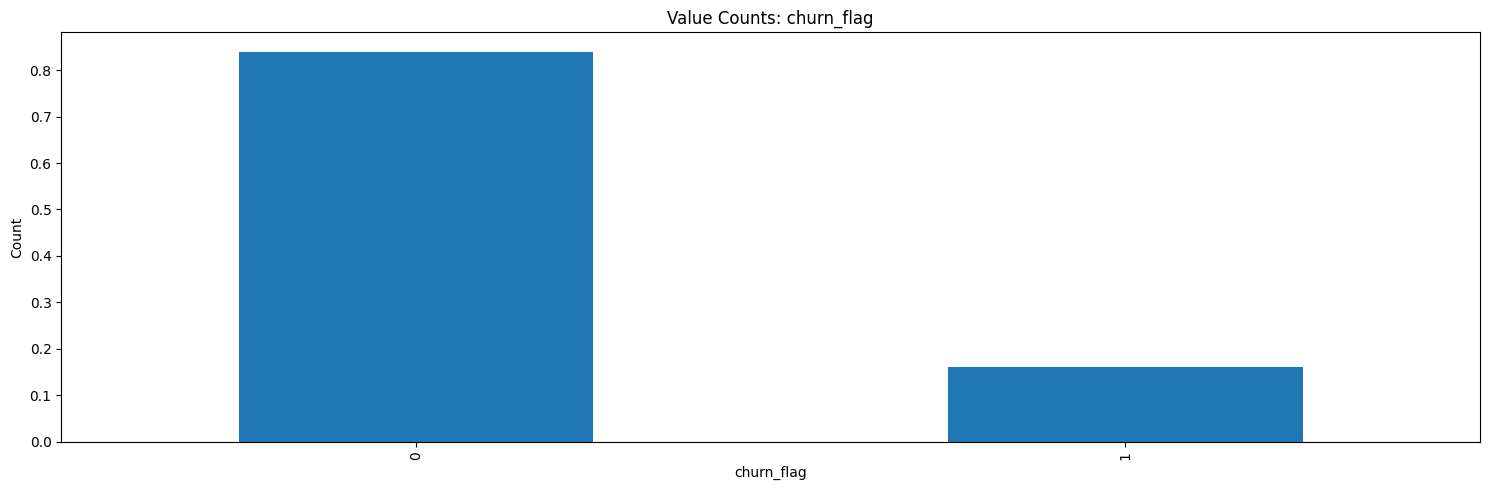

In [15]:
analysis_plots(df1,[target],'Categorical',ncols=1,Normalize=True)

### Categoricals
* Number of females is a bit more than males.
* Most people are in having Blue Card's. Number of people in higher card category is too low.
* Unknown is category in Income Category, Education Level, Maritial status.

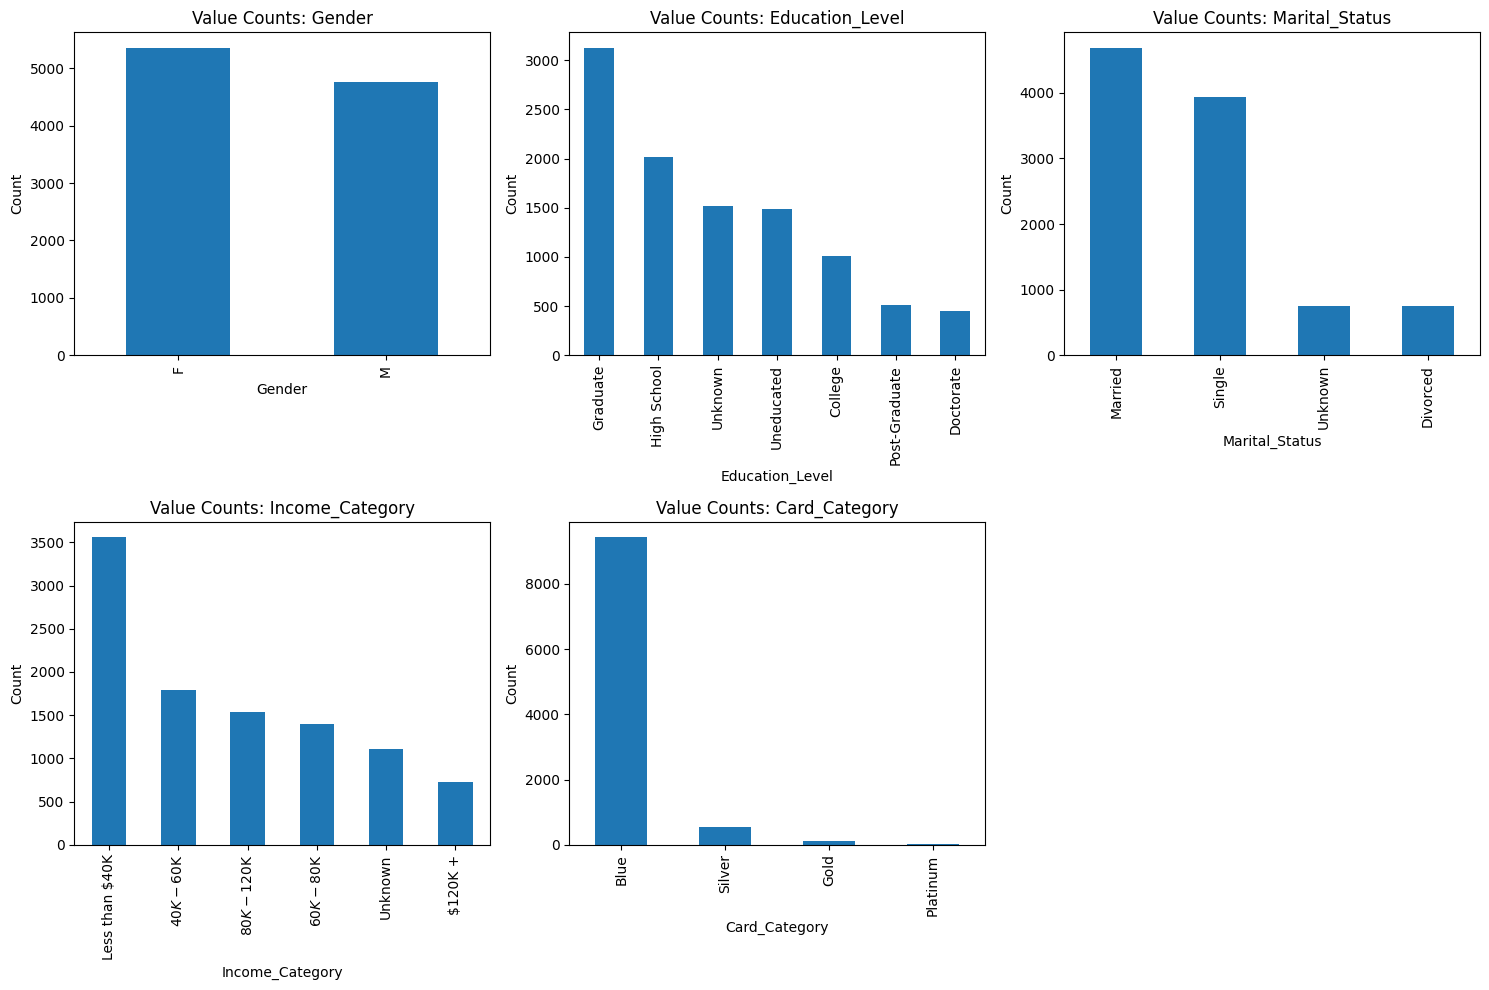

In [16]:
analysis_plots(df1,Categoricals,'Categorical',ncols=3)

### Numeric_Discrete
* Majority of people joined 36 months ago. That's a anomaly is data.
* 80% of customers have atleast 3 relationship with bank
* Median age is 46 yrs. 50% customer's are aged between  41 to 52.

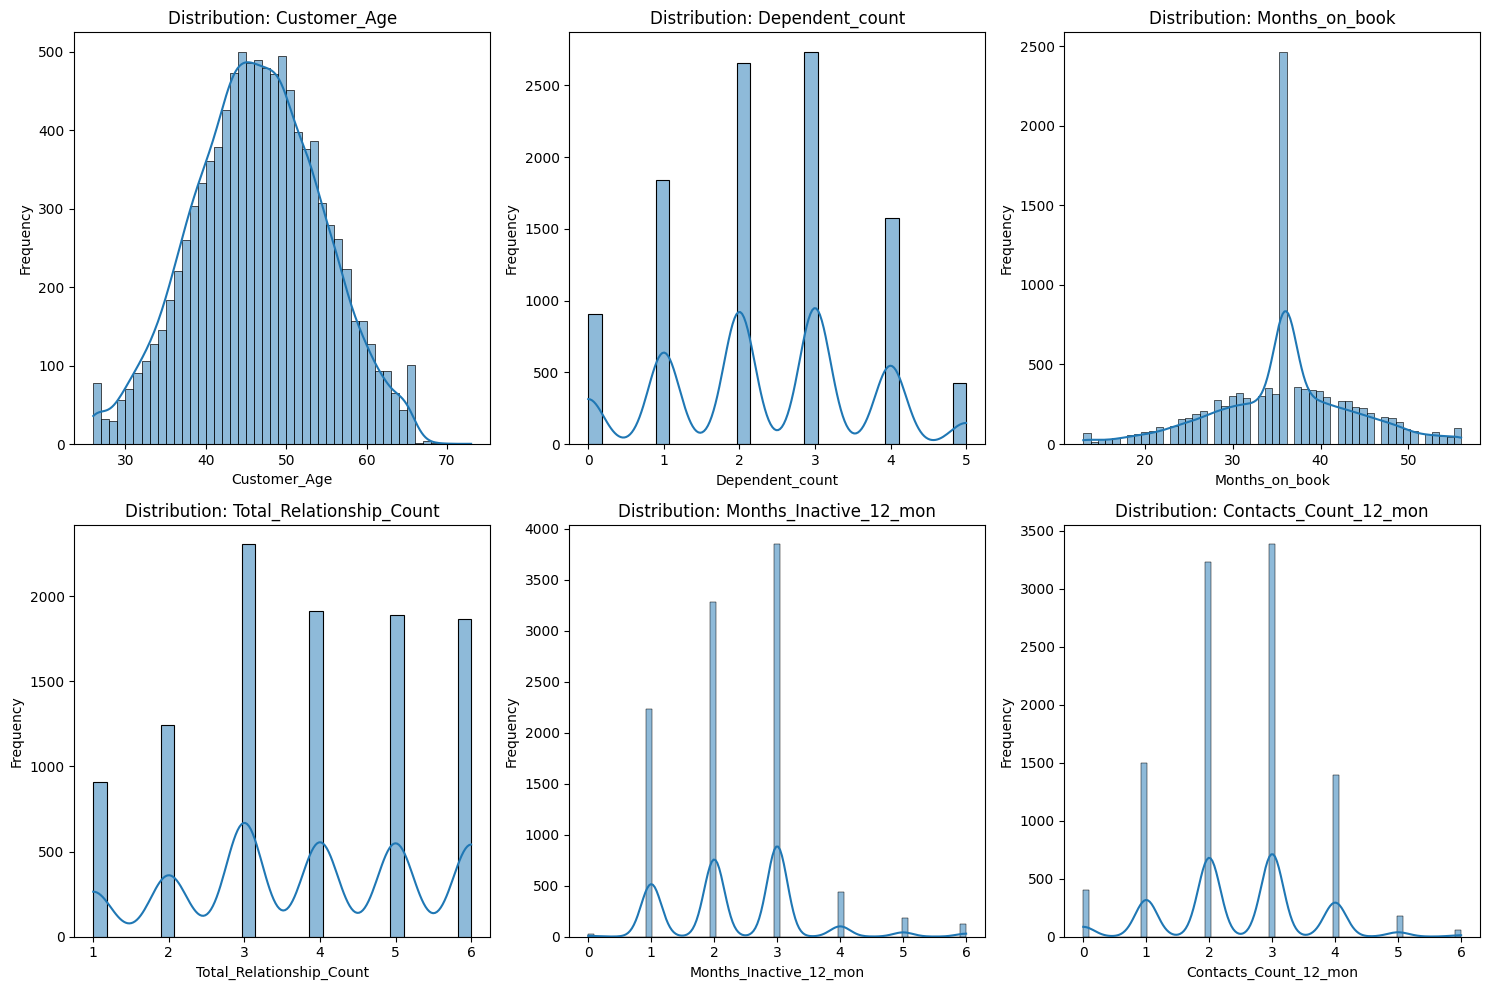

In [17]:
analysis_plots(df1,Numeric_Discrete,'Numeric_Discrete')

### Numeric_Continuous
* Avg. open to buy is really similar to Credit Limit. So keep only one while trainning.
* Credit limit is right skewed due that fact that majority of people have lower level cards. 
* Total Transaction Amt change, Count change Q4 -Q1 is less than one indicating lowering spendings in Q4 relative to Q1. 
* There a 2 clusters in Total Transaction Count indicating a possible divide of churners and non-churners. This could be a strong indication of churn. Will verify this later.
* There are 4 clusters on total transaction amount which is can be grouped up in pais of 2 cluseters similar to total transaction count this could be 2nd major factor affecting churn. Will verify this later.
* Total transaction count and total transaction count is highly positively co-related
* Majority of people have really low revolving balance this could be an indicator of really low usage of card. This might have a strong co-relation to churn.

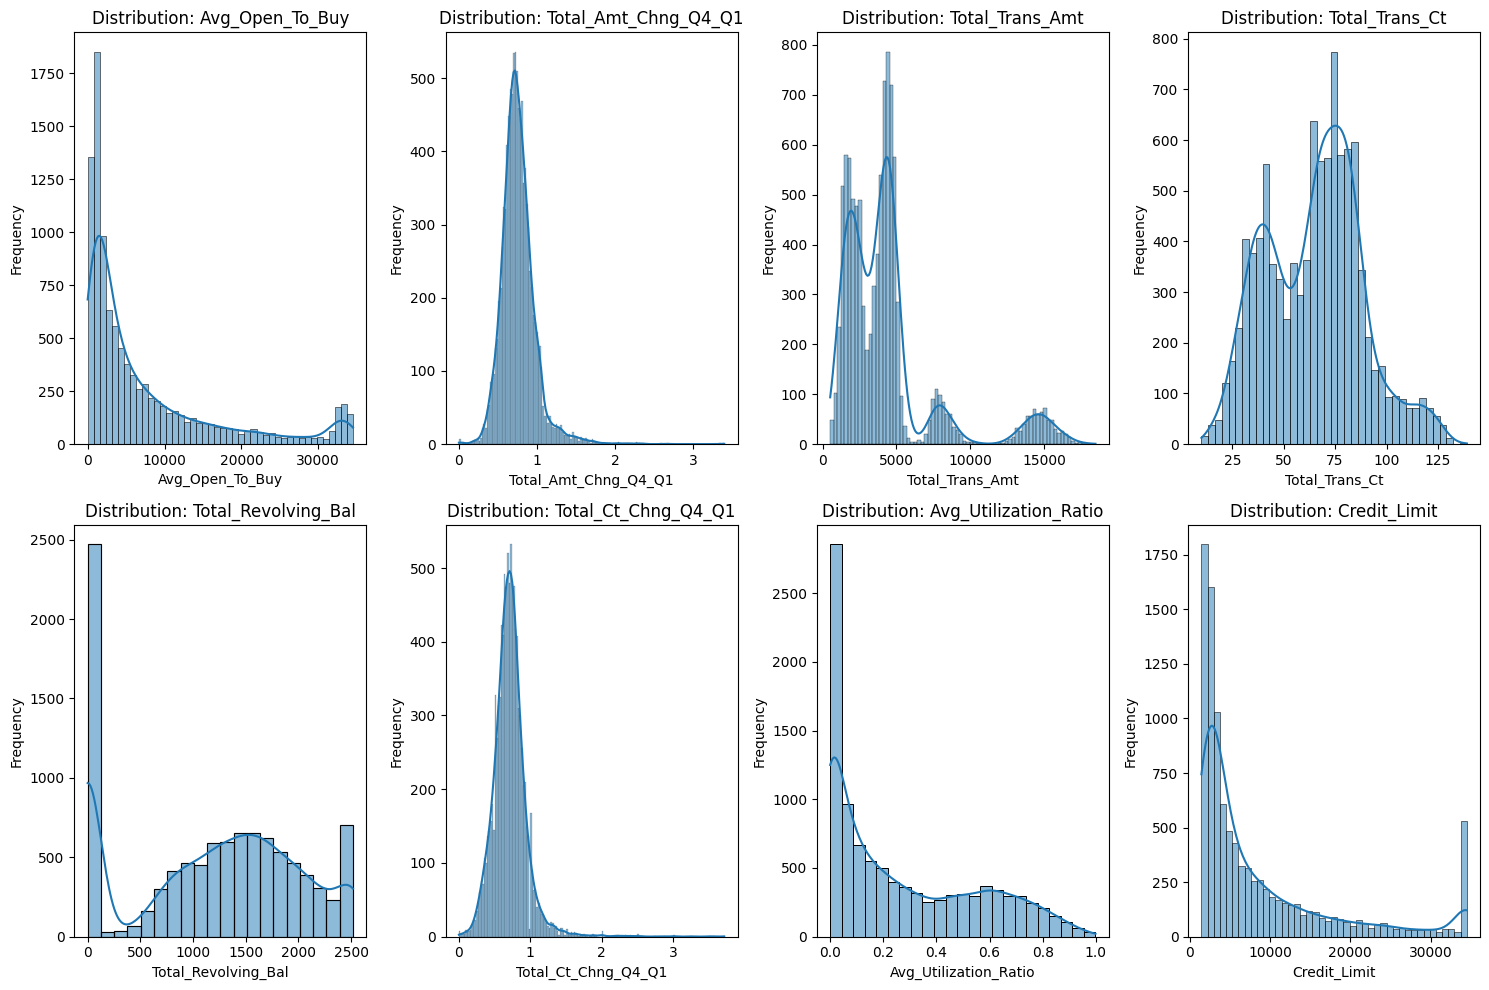

In [18]:
analysis_plots(df1,Numeric_Continuous,'Numeric_Continuous',ncols=4)


## Bivariate Analysis

### Numeric_Discrete x Numeric_Discrete
* Customer age has a strong co-relation with months on book.

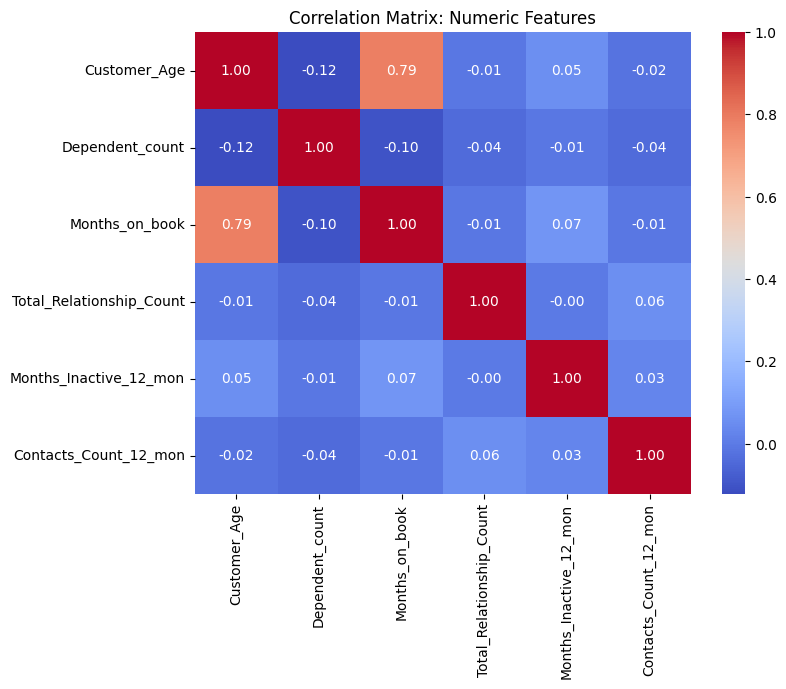

In [19]:
corr_heatmap(df1,Numeric_Discrete)

<Axes: xlabel='Months_on_book', ylabel='Customer_Age'>

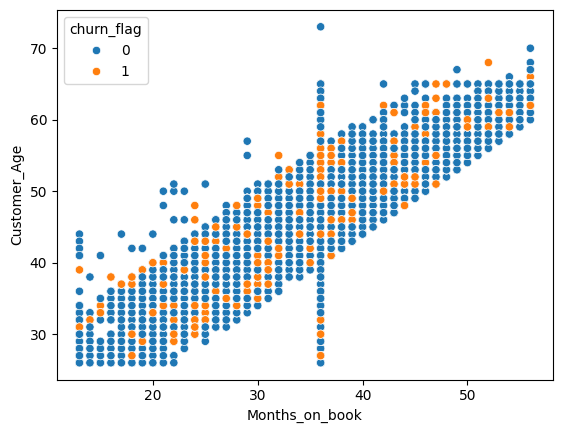

In [20]:
sns.scatterplot(df1,x='Months_on_book',y='Customer_Age',hue=target)

### Numeric_Continuous x Numeric_Continuous
* Avg. open to buy is really similar to Credit Limit. So keep only one while trainning. Both are perfectly correlated
* Total transaction count and total transaction count is highly positively co-related
* Avg. Utilization Ratio has a strong positive co-relation to Total Revolving Bal.
* Avg. Utilization Ratio has a moderate negative co-relation to Credit limit and in turn to Avg. open to buy.
* Total Transaction Amount Change Q4 Q1 has moderate co-relation to Total Transaction Count Change Q4 Q1

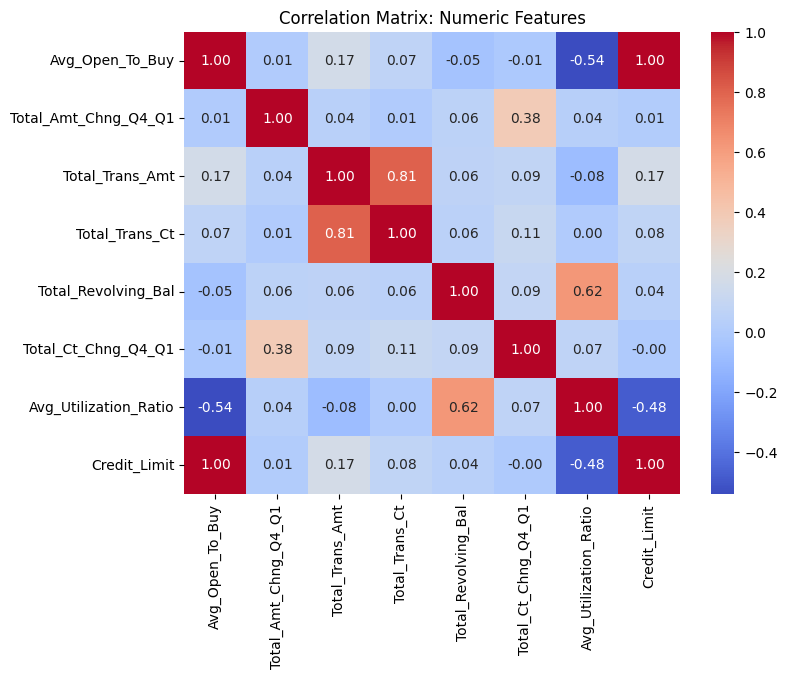

In [21]:
corr_heatmap(df1,Numeric_Continuous)

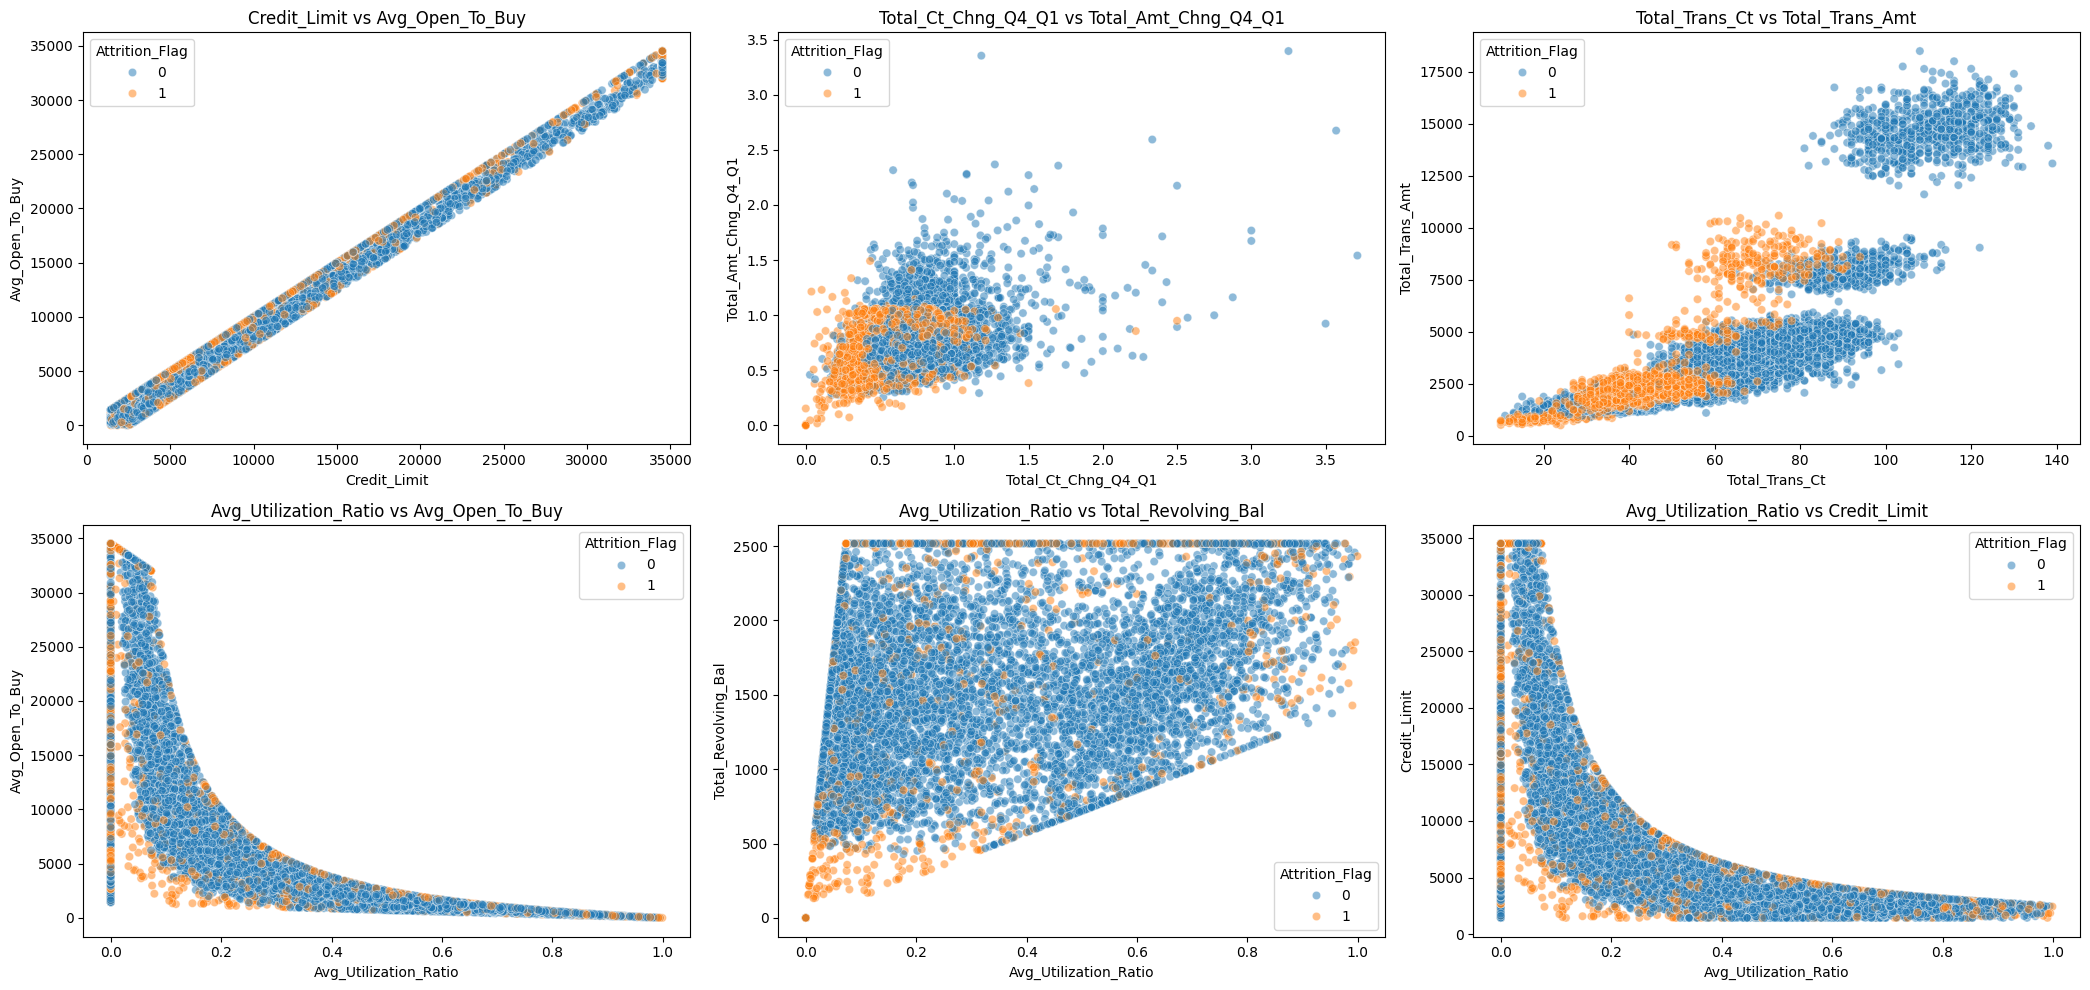

In [22]:
scatter = [['Credit_Limit','Avg_Open_To_Buy'],['Total_Ct_Chng_Q4_Q1','Total_Amt_Chng_Q4_Q1'],['Total_Trans_Ct','Total_Trans_Amt'],['Avg_Utilization_Ratio','Avg_Open_To_Buy'],['Avg_Utilization_Ratio','Total_Revolving_Bal'],['Avg_Utilization_Ratio','Credit_Limit']]

ncols = 3
nrows = math.ceil(len(scatter) / ncols)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(7 * ncols, 5 * nrows))

axes = axes.flatten()

for i, (x, y) in enumerate(scatter):
    ax = axes[i]
    sns.scatterplot(data=df1, x=x, y=y, hue=target, alpha=0.5, ax=ax)
    ax.set_title(f'{x} vs {y}')
    ax.legend(title='Attrition_Flag')


for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


### Mixed
* Total Transaction Amount, Total Transaction count have a bit moderate co-relation with Total Relationship Count

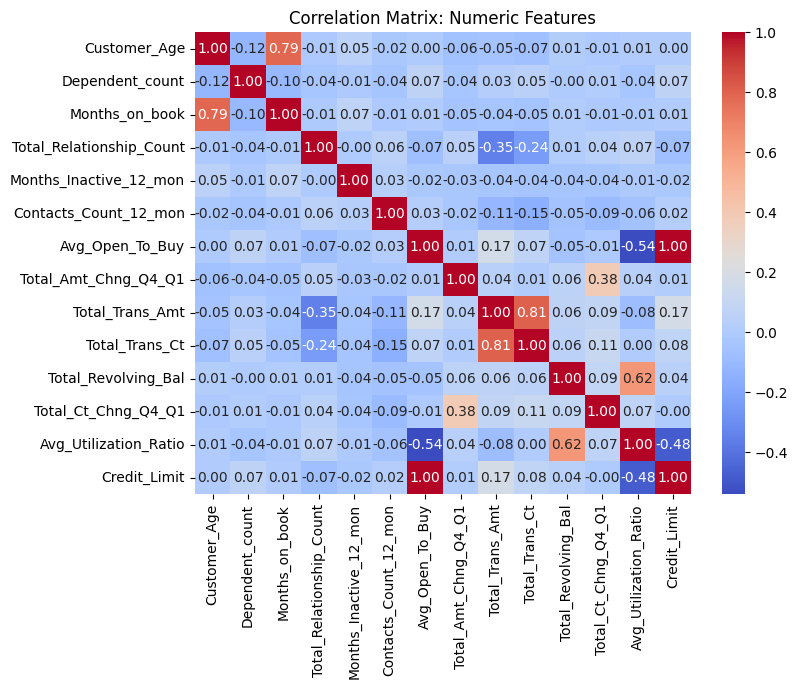

In [23]:
Numeric = Numeric_Discrete + Numeric_Continuous
corr_heatmap(df1,Numeric)

## Relation to target Analysis

### Categoricals
* The probability of churn is higher among female customers compared to male customers.
* Customers with an unknown education level or income category exhibit the third highest probability of churn. People in lower and higher income churun more then the ones in middle income. People with doctorate have especially higher level of churn rate over those without.
* Attrition probability is highest among customers with an unknown marital status. Single, Divored people churn more than Married
* Customer attrition tends to rise with premium card segments, as clients in these tiers typically have higher expectations and are more likely to switch providers if their requirements are not fully satisfied. Blue card holder are more likely to churn over silver. But gold and platinum are more likely to churn over blue.

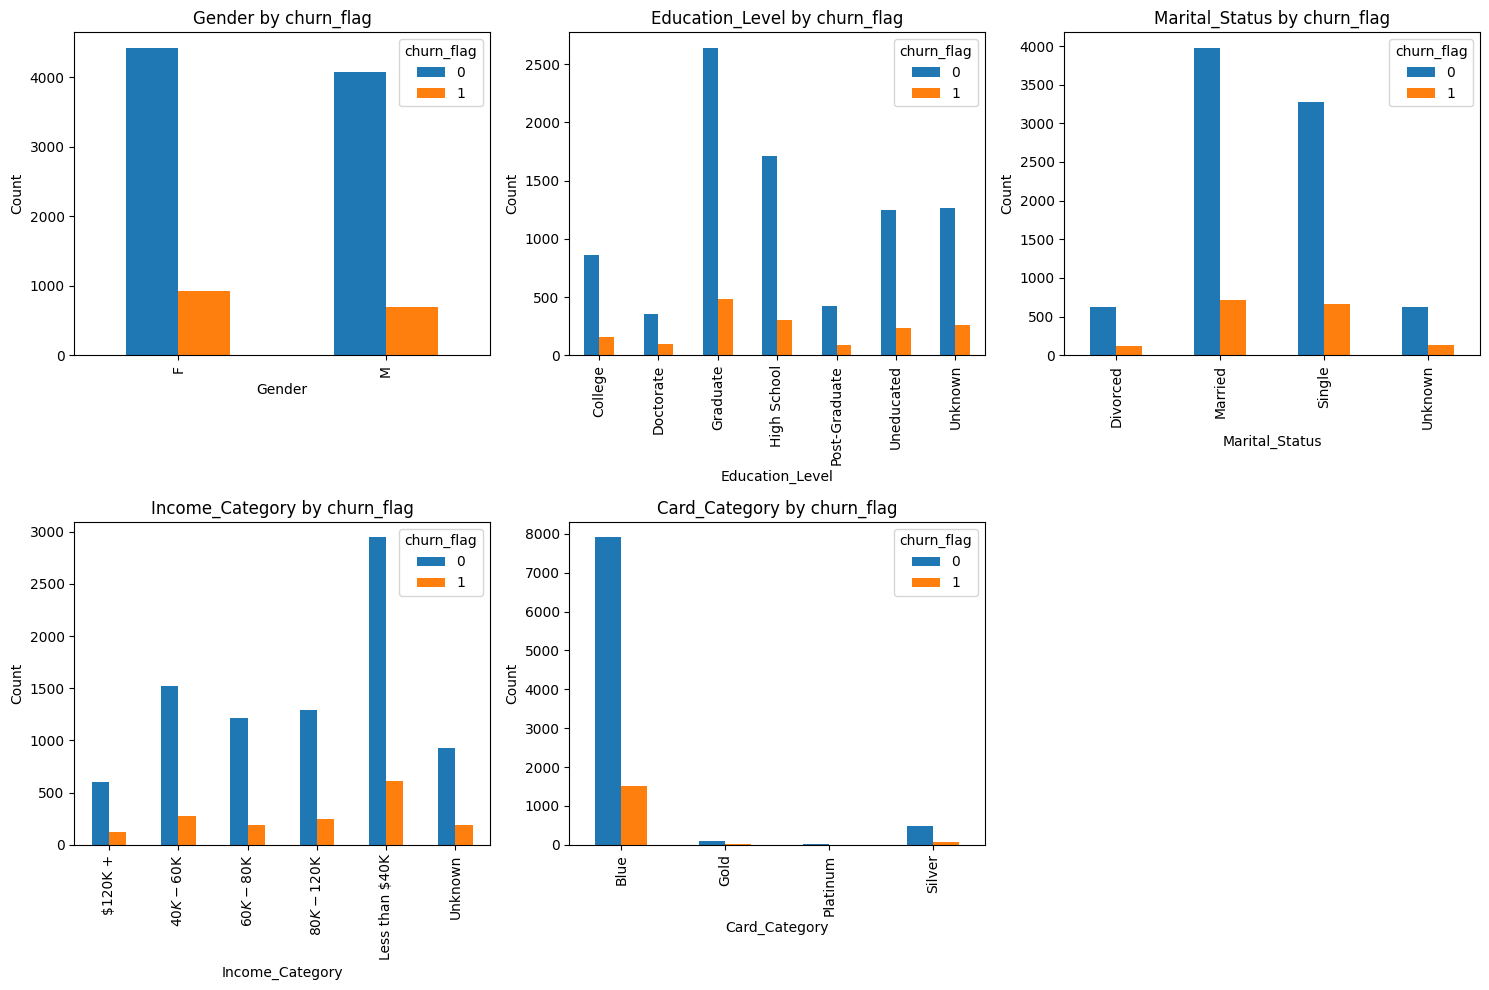

In [24]:
analysis_plots(df1,Categoricals,'Categorical',target_col=target)

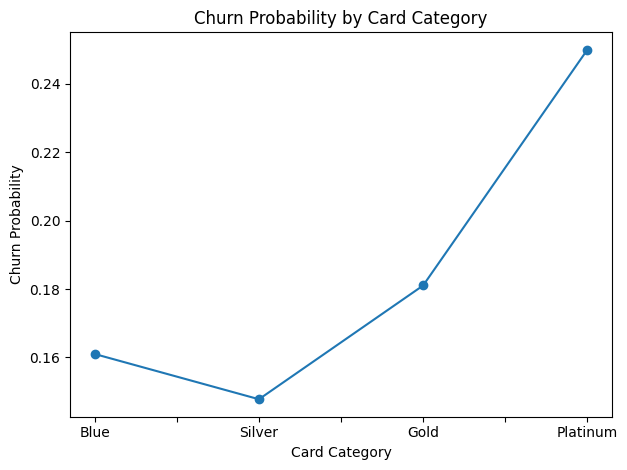

In [25]:
cards = pd.crosstab(index=df1['Card_Category'], columns=df1[target])
cards['Churn Probability'] = cards[1] / (cards[1] + cards[0])
cards = cards.reindex(['Blue', 'Silver', 'Gold', 'Platinum'])
cards['Churn Probability'].plot(marker='o')
plt.ylabel('Churn Probability')
plt.xlabel('Card Category')
plt.title('Churn Probability by Card Category')
plt.tight_layout()
plt.show()


In [26]:
gender = pd.crosstab(columns=df1['Gender'], index=df1[target]).T
gender['Churn Probability'] = gender[1] / (gender[1] + gender[0])
gender

churn_flag     0    1  Churn Probability
Gender                                  
F           4428  930           0.173572
M           4072  697           0.146152

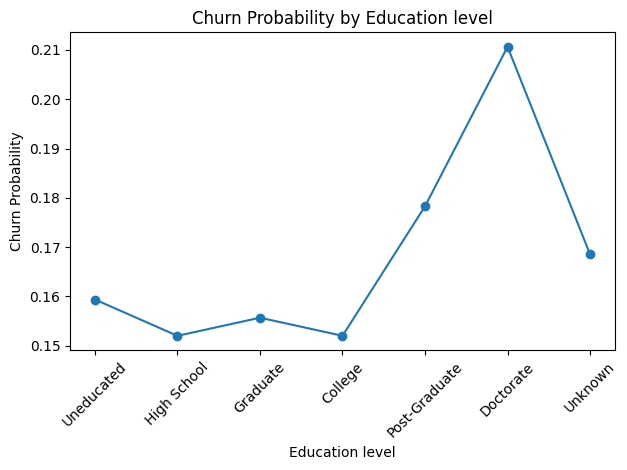

In [27]:
Education_level = pd.crosstab(columns=df1['Education_Level'], index=df1[target]).T
Education_level['Churn Probability'] = Education_level[1] / (Education_level[1] + Education_level[0])
Education_level = Education_level.reindex(['Uneducated','High School','Graduate','College','Post-Graduate','Doctorate','Unknown'])
Education_level['Churn Probability'].plot(marker='o')
plt.title('Churn Probability by Education level')
plt.ylabel('Churn Probability')
plt.xlabel('Education level')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

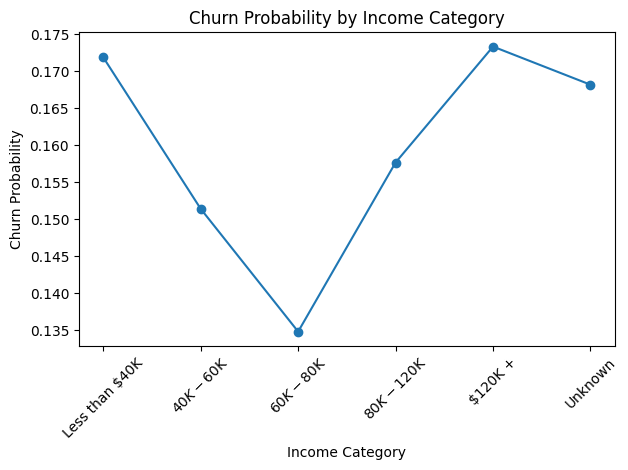

In [28]:
Income_Category = pd.crosstab(columns=df1['Income_Category'], index=df1[target]).T
Income_Category['Churn Probability'] = Income_Category[1] / (Income_Category[1] + Income_Category[0])
Income_Category = Income_Category.reindex(['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown'])
Income_Category['Churn Probability'].plot(marker='o')
plt.title('Churn Probability by Income Category')
plt.ylabel('Churn Probability')
plt.xlabel('Income Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

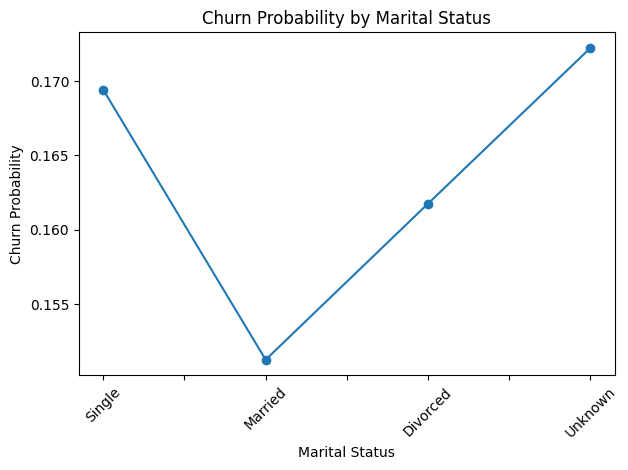

In [29]:
Marital_Status = pd.crosstab(columns=df1['Marital_Status'], index=df1[target]).T
Marital_Status['Churn Probability'] = Marital_Status[1] / (Marital_Status[1] + Marital_Status[0])
Marital_Status = Marital_Status.reindex(['Single', 'Married', 'Divorced', 'Unknown'])
Marital_Status['Churn Probability'].plot(marker='o')
plt.title('Churn Probability by Marital Status')
plt.ylabel('Churn Probability')
plt.xlabel('Marital Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Numeric Discrete
* People who have lower number of relationships with banks are more likely to churn. Having atleast 3 relatioships with bank drops churn probability by 1.5 times.
* Probability of churn increases with increases in number of contacts made to bank in last 12 months. If person has contacted bank 6 times in last 12 months then it alomost certain that person churns.
* Instresting that people who were not inactive even for a single month churned the most. Almost 90% of its customers were inactive atleast 2 months in last 12 months.

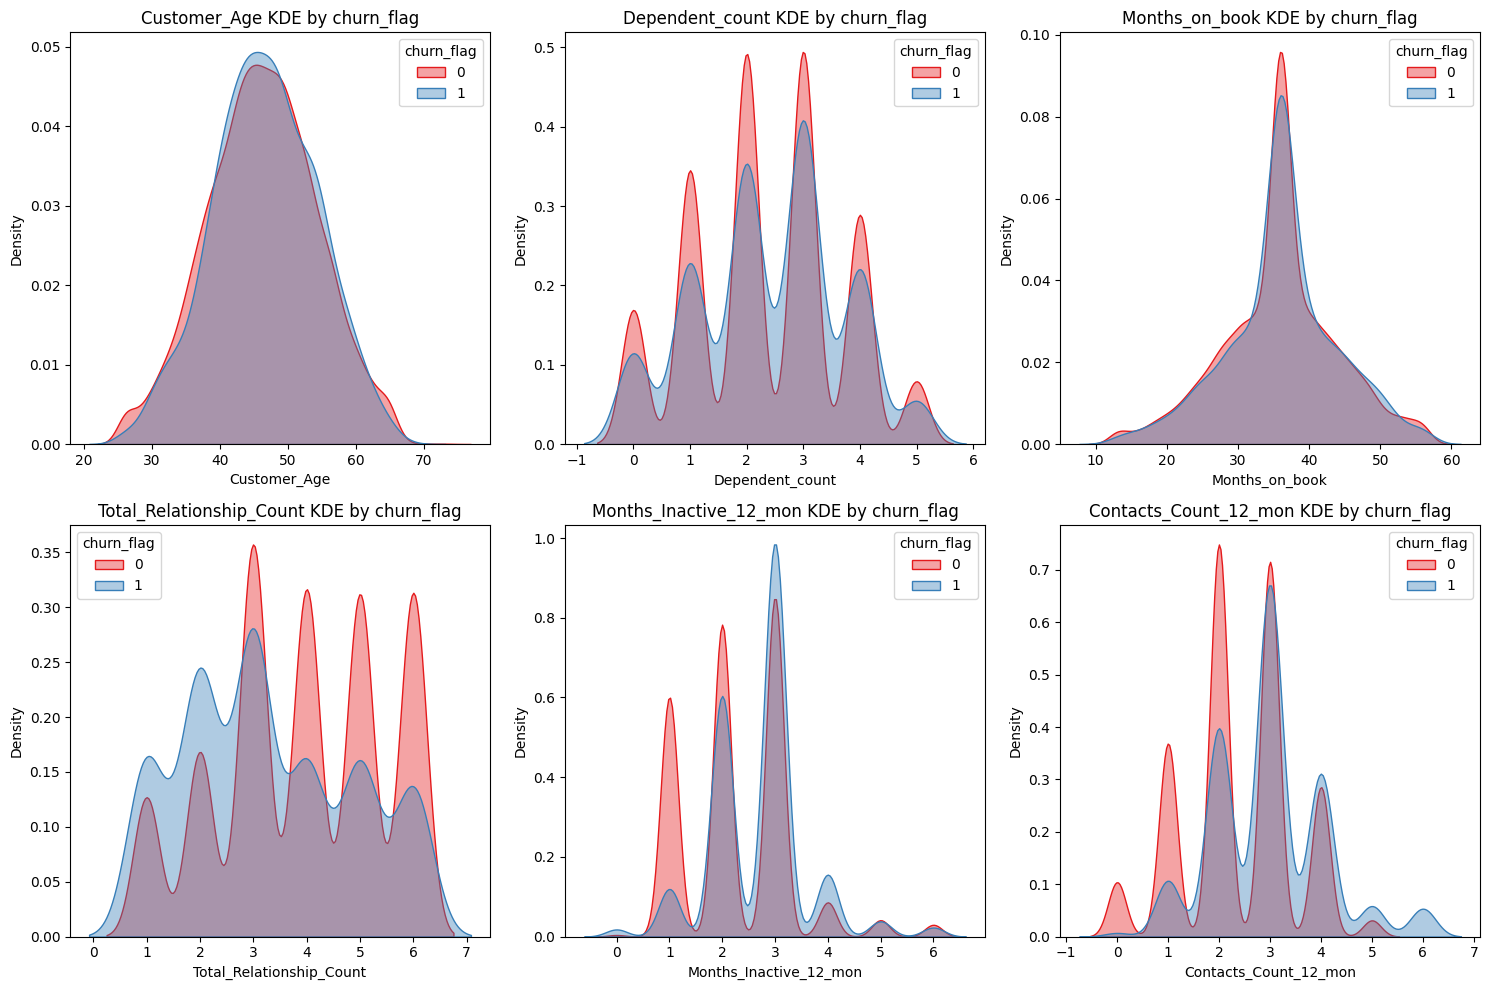

In [30]:
analysis_plots(df1,Numeric_Discrete,'Numeric_Discrete',target_col=target)

Text(0, 0.5, 'Churn Probability')

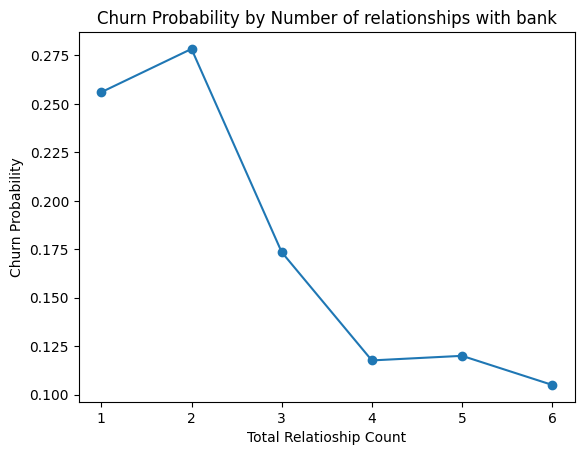

In [31]:
Total_Relationship_Count = pd.crosstab(index=df1['Total_Relationship_Count'], columns=df1[target])
Total_Relationship_Count['Churn Probability'] = Total_Relationship_Count[1]/(Total_Relationship_Count[0]+Total_Relationship_Count[1])
Total_Relationship_Count['Churn Probability'].plot(marker='o')
plt.title('Churn Probability by Number of relationships with bank')
plt.xlabel('Total Relatioship Count')
plt.ylabel('Churn Probability')

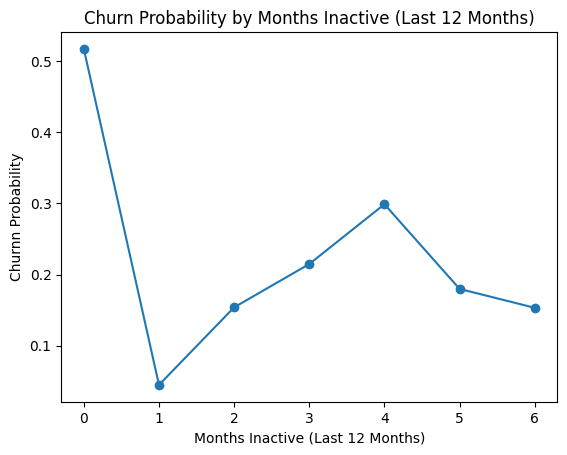

In [32]:
Months_Inactive_12_mon = pd.crosstab(index=df1['Months_Inactive_12_mon'], columns=df1[target])
Months_Inactive_12_mon['Churn Probability'] = Months_Inactive_12_mon[1] / (Months_Inactive_12_mon[0] + Months_Inactive_12_mon[1])
Months_Inactive_12_mon['Churn Probability'].plot(marker='o')
plt.title('Churn Probability by Months Inactive (Last 12 Months)')
plt.xlabel('Months Inactive (Last 12 Months)')
plt.ylabel('Churnn Probability')
plt.show()

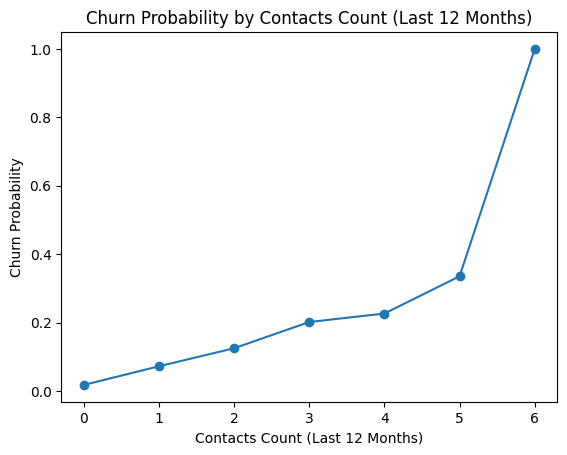

In [33]:
Contacts_Count_12_mon = pd.crosstab(index=df1['Contacts_Count_12_mon'], columns=df1['churn_flag'])
Contacts_Count_12_mon['Churn Probability'] = Contacts_Count_12_mon[1] / (Contacts_Count_12_mon[0] + Contacts_Count_12_mon[1])
Contacts_Count_12_mon['Churn Probability'].plot(marker='o')
plt.title('Churn Probability by Contacts Count (Last 12 Months)')
plt.xlabel('Contacts Count (Last 12 Months)')
plt.ylabel('Churn Probability')
plt.show()

### Numeric Continuous
* Total Transaction Amount, Total Transaction Count,Total Transaction Change Ratio Q4 to Q1,Total Revolving Balance, Average Utilization Ratio are having a clear low values cluster of Attrited Customers. Thus are strong indicators of churn.
* Avg. open to buy, Credit Limit, Total Transaction Amount change Q4 to Q1 are not much co-related to churn.
* Total Revolving balance, Avg. Utilization Ratio of churners in near zero. That's a strong indicator of attrition.

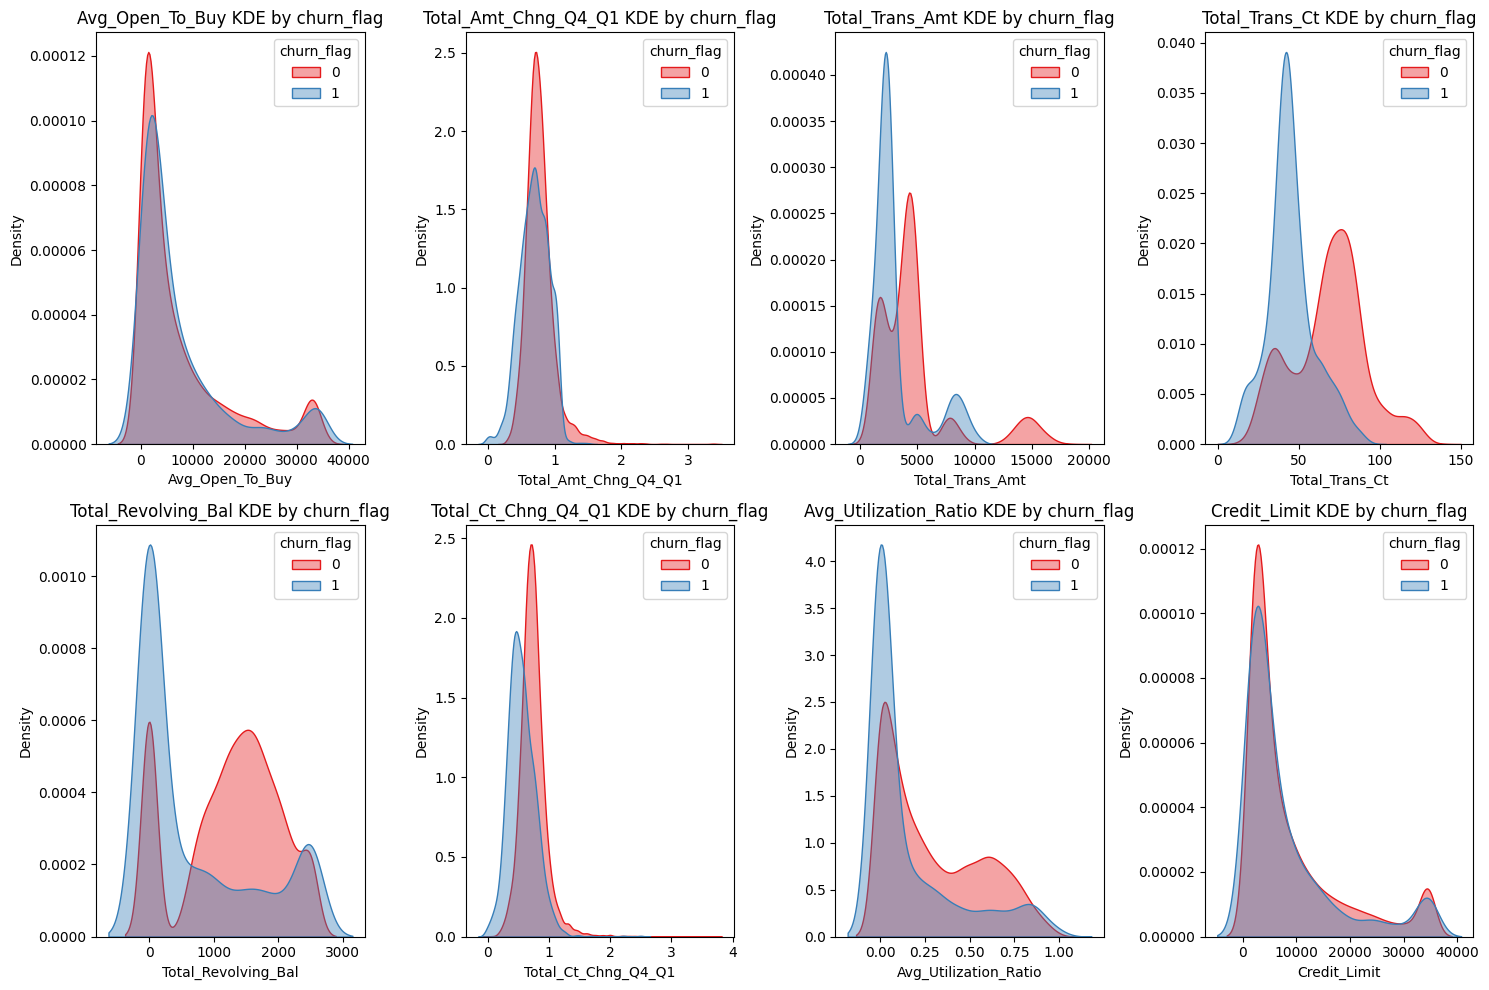

In [34]:
analysis_plots(df1,Numeric_Continuous,'Numeric_Continuous',target_col=target,ncols=4)

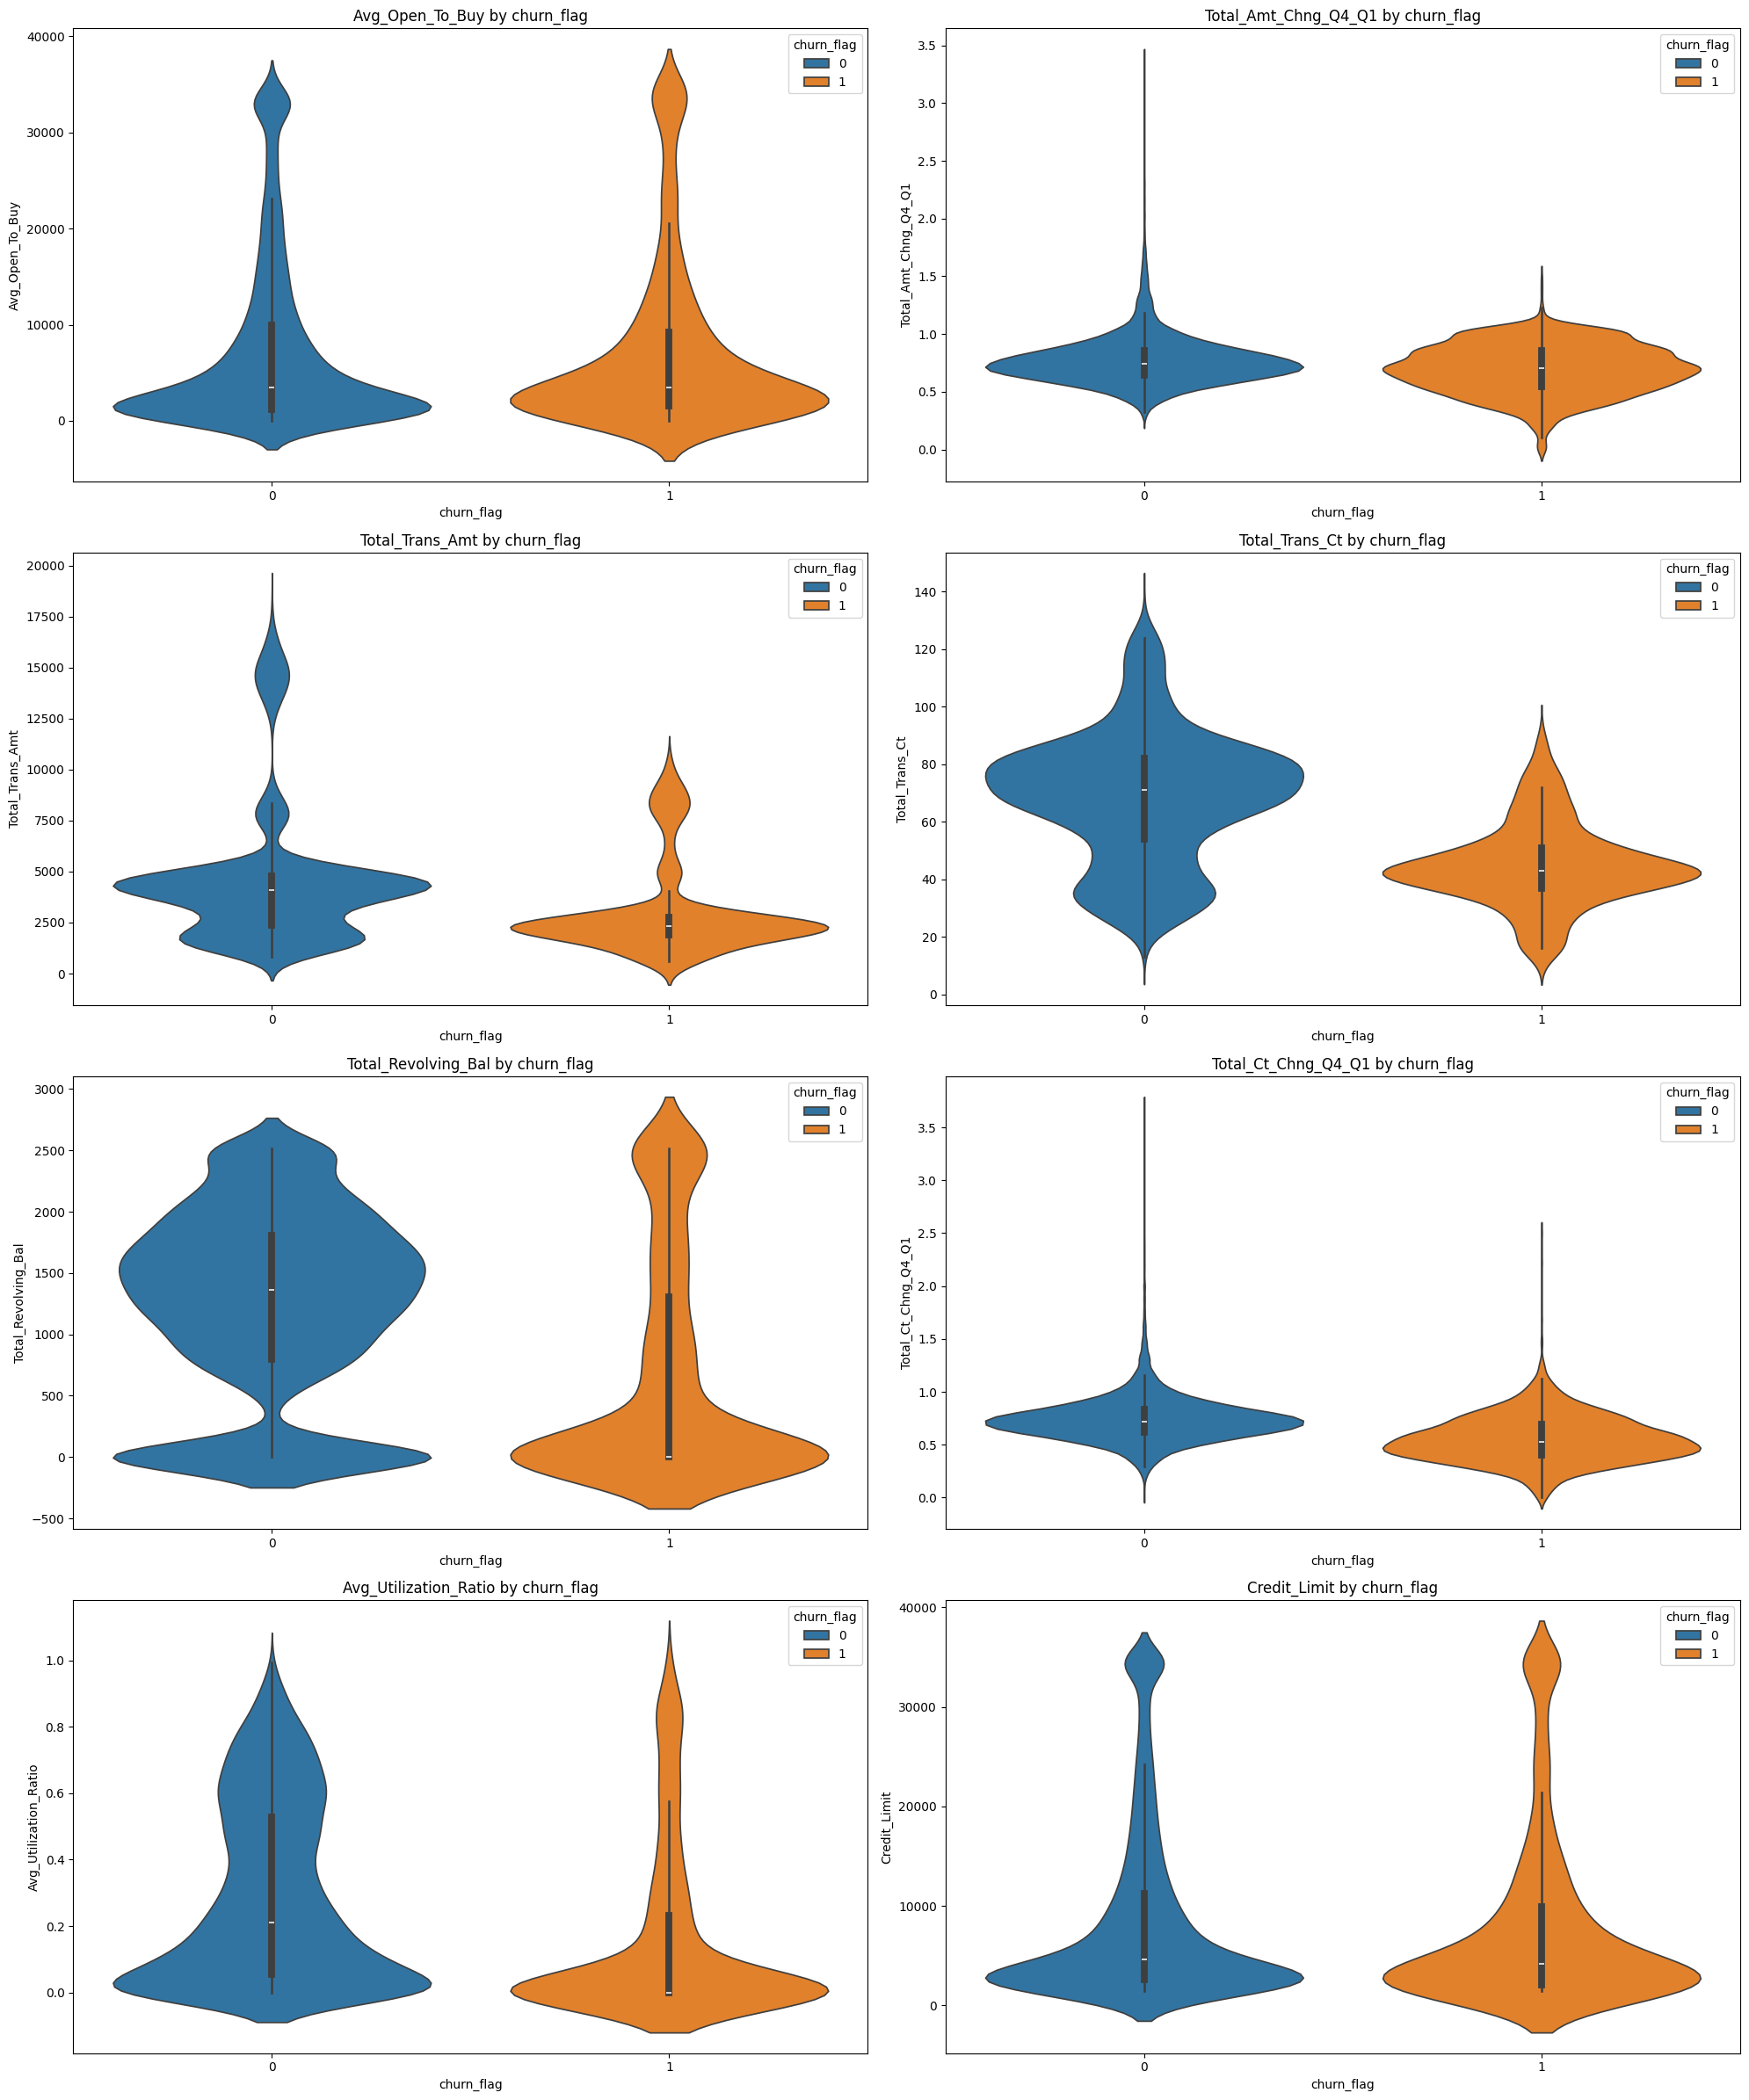

In [35]:
def violin():
    ncols = 2
    nrows = math.ceil(len(Numeric_Continuous) / ncols)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10 * ncols, 6 * nrows))
    axes = axes.flatten()

    for i, col in enumerate(Numeric_Continuous):
        sns.violinplot(
            data=df1,
            x=target,
            y=col,
            ax=axes[i],
            hue=target
        )
        axes[i].set_title(f'{col} by {target}')
        axes[i].set_xlabel(target)
        axes[i].set_ylabel(col)

    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()
violin()

In [36]:
# df1.groupby('')

# Cross Verification
* The probability of churn is higher among female customers compared to male customers.
* Customer attrition tends to rise with premium card segments, as clients in these tiers typically have higher expectations and are more likely to switch providers if their requirements are not fully satisfied. Blue card holder are more likely to churn over silver. But gold and platinum are more likely to churn over blue.
* People who have lower number of relationships with banks are more likely to churn. Having atleast 3 relatioships with bank drops churn probability by 2 times.
* Probability of churn increases with increases in number of contacts made to bank in last 12 months. If person has contacted bank 6 times in last 12 months then it alomost certain that person churns.
* Instresting that people who were not inactive even for a single month churned the most. Almost 90% of its customers were inactive atleast 2 months in last 12 months.
* Total Transaction Amount, Total Transaction Count,Total Transaction Change Ratio Q4 to Q1,Total Revolving Balance, Average Utilization Ratio are having a clear low values cluster of Attrited Customers. Thus are strong indicators of churn.
* Avg. open to buy, Credit Limit, Total Transaction Amount change Q4 to Q1 are not much co-related to churn.
* Total Revolving balance, Avg. Utilization Ratio of churners in near zero. That's a strong indicator of attrition.

## Categorical

### Gender basis
* Intrestingly Total Transaction Count,Amount, Avg. Utilization Ratio for women are higher even though they are more likely to leave than men. This could be due to lower Credit Limit on card. Because their spendings are more in amount and number than men.
* Women in high income category are much less than men. That might explain them using lower tier cards having lower credit limit. In unknown income category there is a disproportionate 
number of women over men.

In [37]:
gender = pd.crosstab(df1['Gender'], df1['churn_flag'])
gender['Churn Probability'] = gender[1]/(gender[0]+gender[1])
pd.DataFrame(gender['Churn Probability'])

Churn Probability
Gender                   
F                0.173572
M                0.146152

FileNotFoundError: [Errno 2] No such file or directory: '../object/Gender.png'

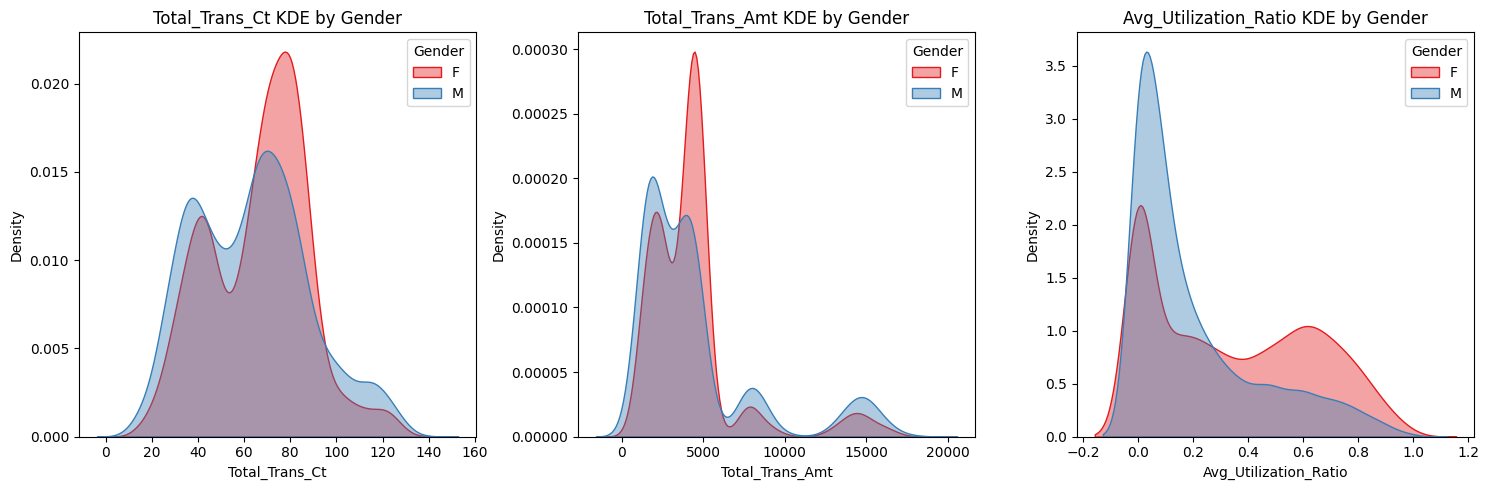

In [38]:
ax = analysis_plots(df1,['Total_Trans_Ct','Total_Trans_Amt','Avg_Utilization_Ratio'],'Numeric_Continuous',target_col='Gender',save='../object/Gender.png')
type(ax)

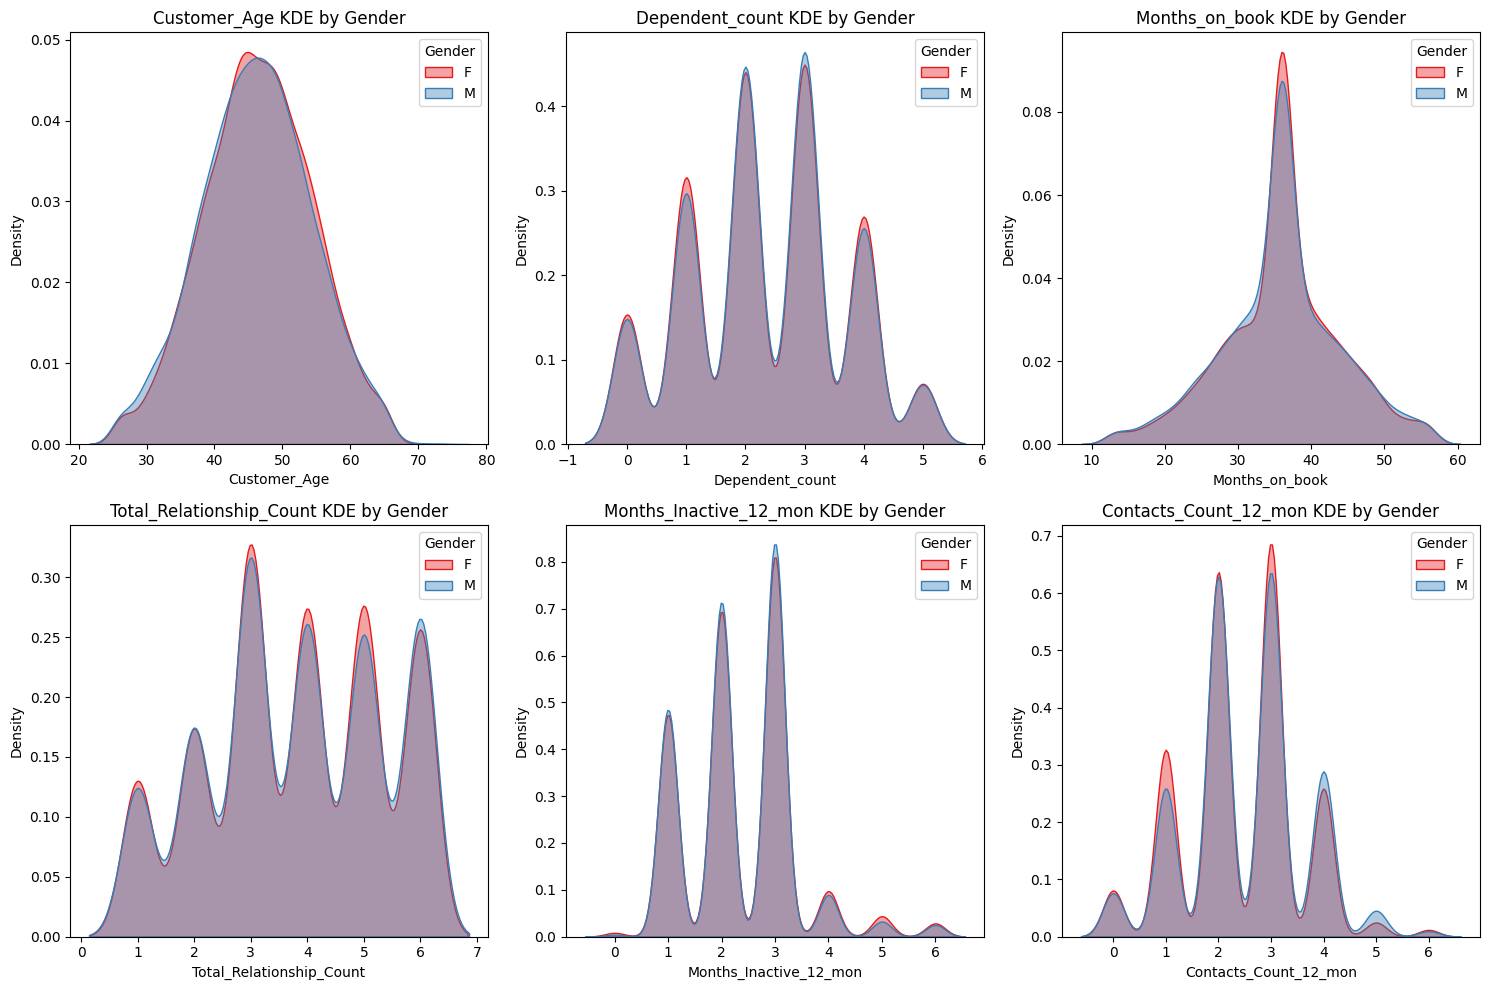

In [ ]:
analysis_plots(df1,Numeric_Discrete,'Numeric_Discrete',target_col='Gender')

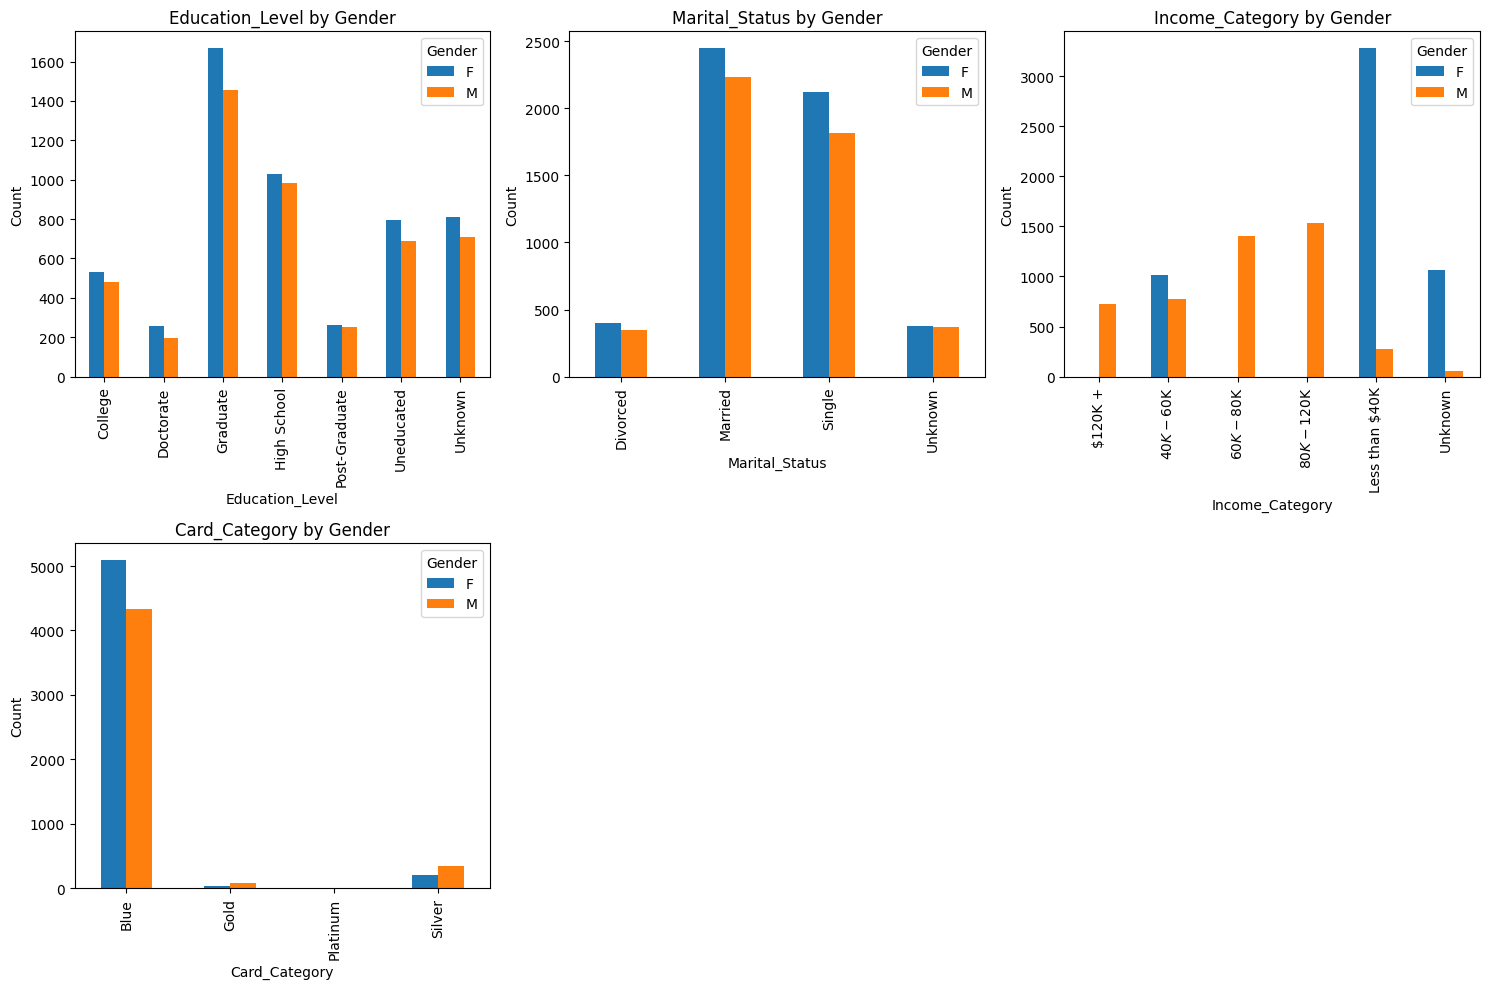

In [ ]:
analysis_plots(df1, [col for col in Categoricals if col != 'Gender'], 'Categorical', target_col='Gender')

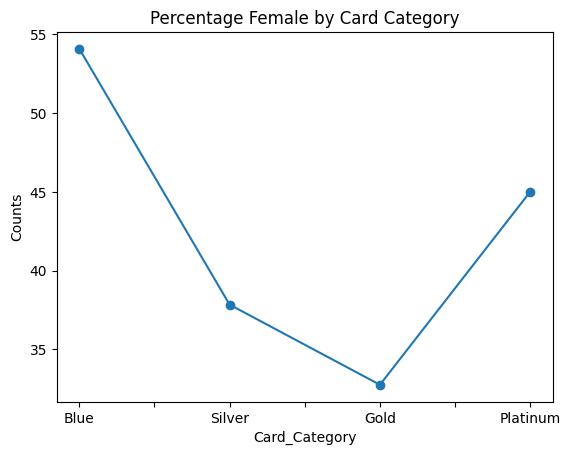

In [ ]:
gender = pd.crosstab(df1['Gender'], df1['Card_Category']).T
gender = gender.reindex(['Blue', 'Silver', 'Gold', 'Platinum'])
gender['Percentage Female'] = gender['F']*100 / (gender['M'] + gender['F'])
gender['Percentage Female'].plot(marker='o')
plt.ylabel('Counts')
plt.title('Percentage Female by Card Category')
plt.savefig('../object/gender_by_card_type')


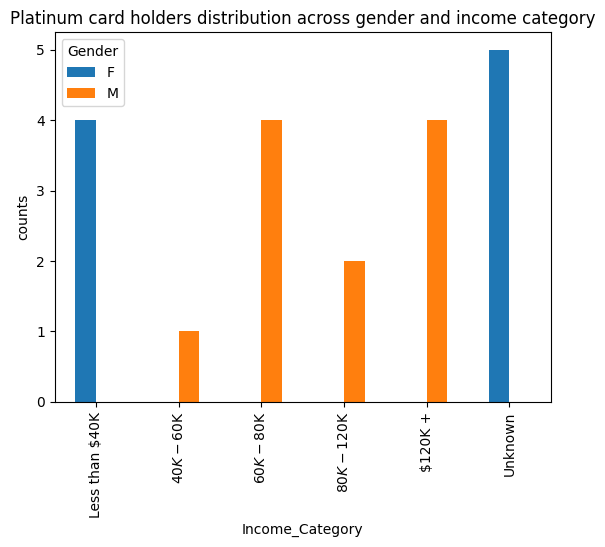

In [ ]:
income_order = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown']
df_plot = (
    df1[df1['Card_Category'] == 'Platinum']
    .groupby('Gender')['Income_Category']
    .value_counts()
    .unstack()
    .reindex(columns=income_order)
    .T
)
df_plot.plot(kind='bar')
plt.title('Platinum card holders distribution across gender and income category')
plt.ylabel('counts')
plt.savefig('../object/Platinum card by gender,income category.png', bbox_inches='tight')

### Card Category
* Adding a feature premium flag 1 for gold,platinum and 0 for others will be helpful cuz they have similar plots into 2 groups for Dependent counts, Total relationships with bank, Inactivity in past 12 months, Total transactions count, Avg. Utilization ratio.
* Premium segments have much lower utilization ratio than Non-Premium. Indicating lower intrest in card usage.
* Incentivizing premium segments to spend more is much more benefical than non-premium.
* Platinum is worst performing card category. But there need to be more focus on this. While gold which is also a premium segment is performing much better than it. 

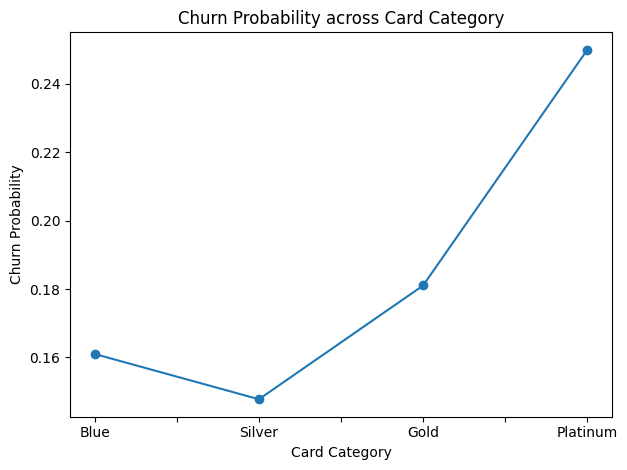

In [ ]:
order = ['Blue', 'Silver', 'Gold', 'Platinum']
card_churn = pd.crosstab(df1['Card_Category'], df1['churn_flag'])
card_churn['Churn Probability'] = card_churn[1] / (card_churn[0] + card_churn[1])
card_churn = card_churn.reindex(order)
card_churn['Churn Probability'].plot(marker='o')
plt.ylabel('Churn Probability')
plt.xlabel('Card Category')
plt.title('Churn Probability across Card Category')
plt.tight_layout()
plt.savefig('../object/Churn Probability across card category.png')
plt.show()

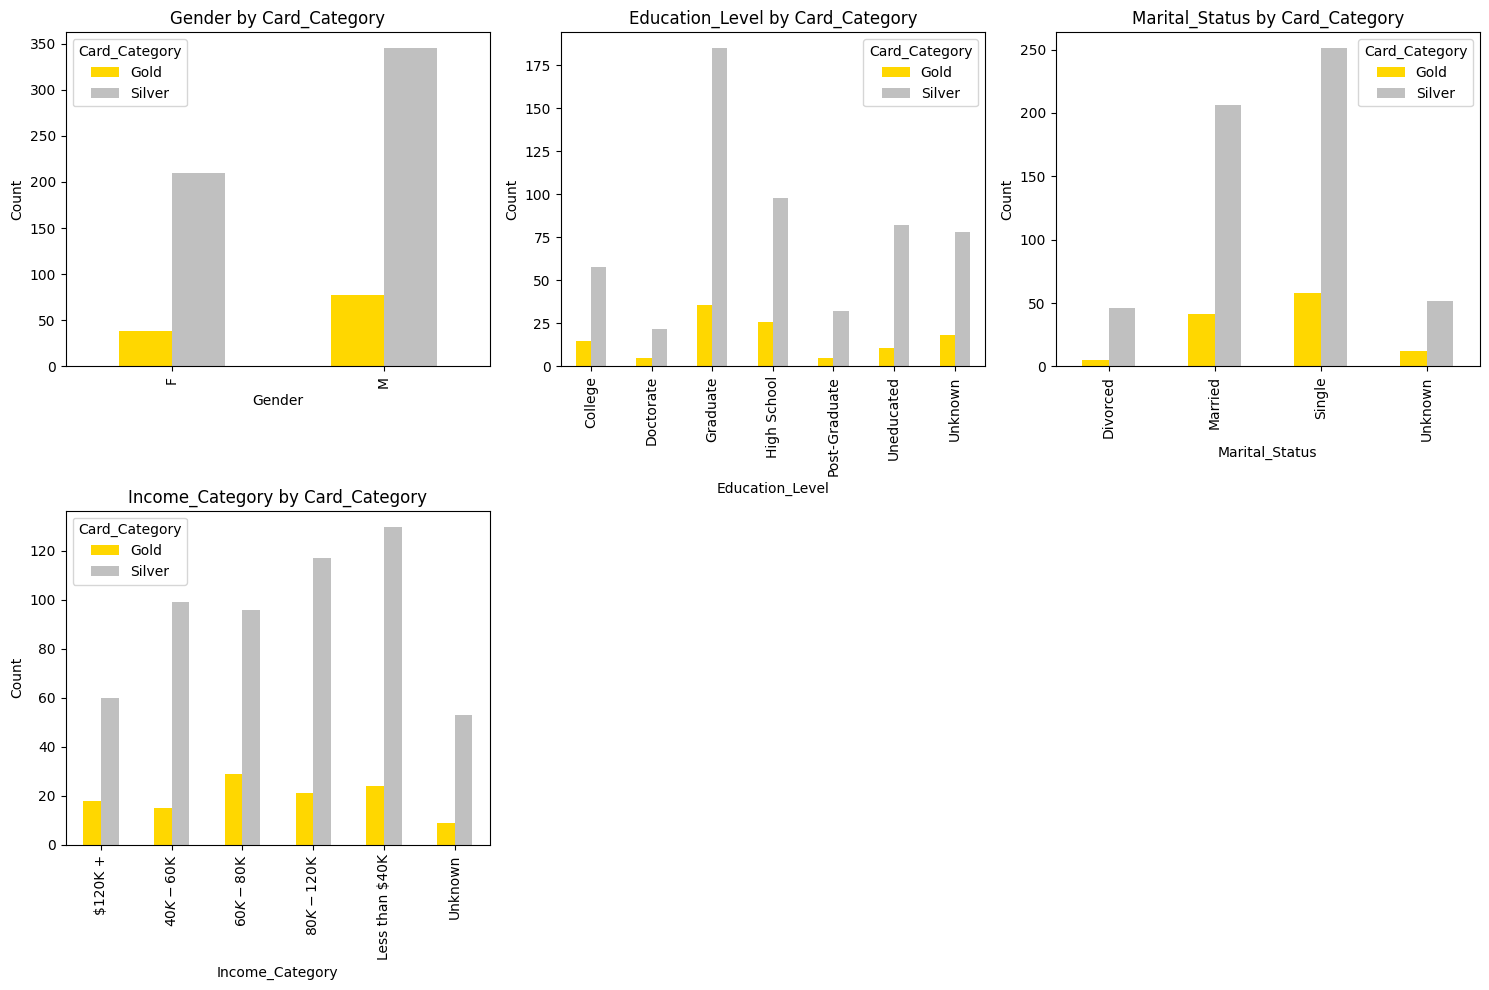

In [ ]:
custom_colors = ['#FFD700', '#C0C0C0']
analysis_plots(
    df1[(df1.Card_Category!= 'Blue') & (df1.Card_Category!= 'Platinum')],
    [col for col in Categoricals if col != 'Card_Category'],
    'Categorical',
    target_col='Card_Category',
    custom_colors=custom_colors
)

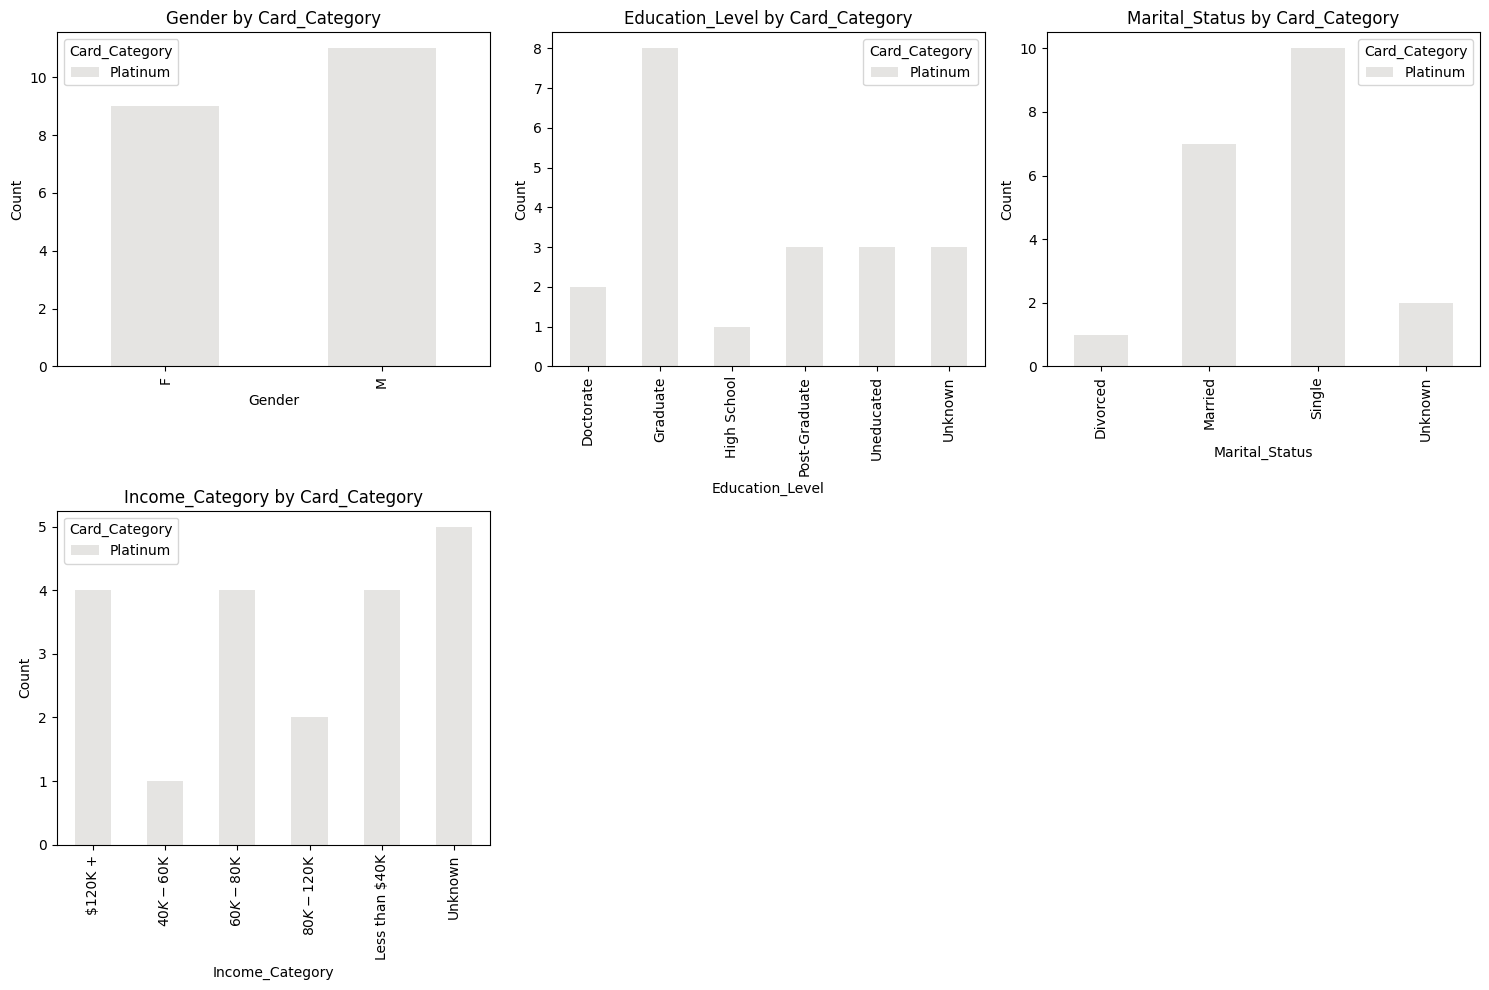

In [ ]:
analysis_plots(df1[df1.Card_Category=='Platinum'], [col for col in Categoricals if col != 'Card_Category'], 'Categorical', target_col='Card_Category',custom_colors= '#E5E4E2')

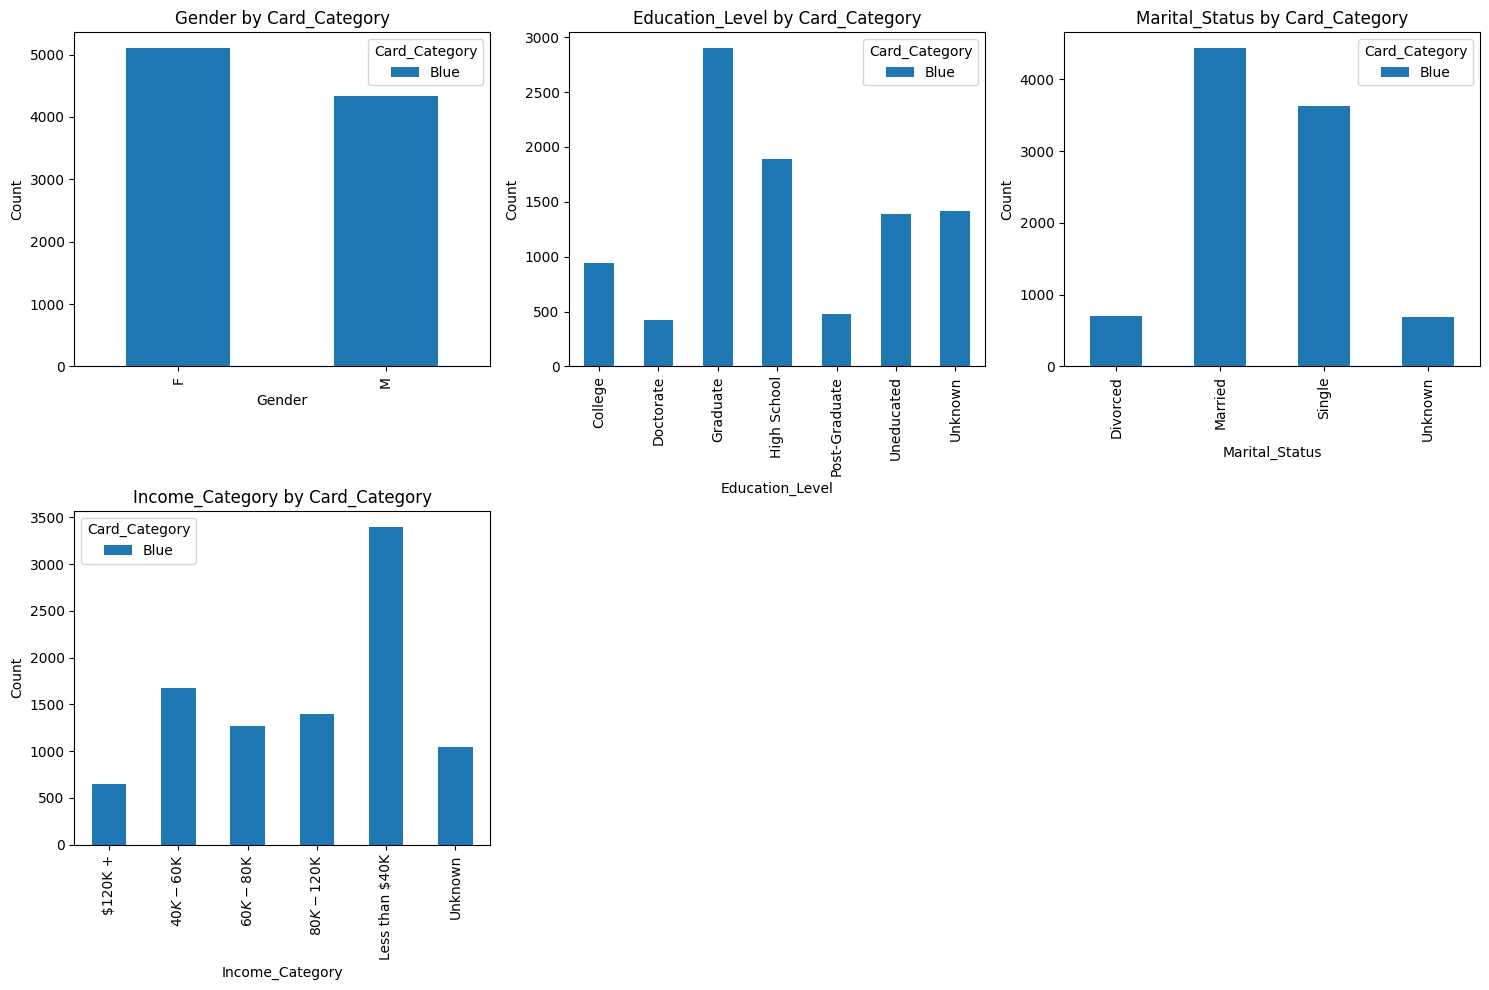

In [ ]:
analysis_plots(df1[df1.Card_Category=='Blue'], [col for col in Categoricals if col != 'Card_Category'], 'Categorical', target_col='Card_Category')

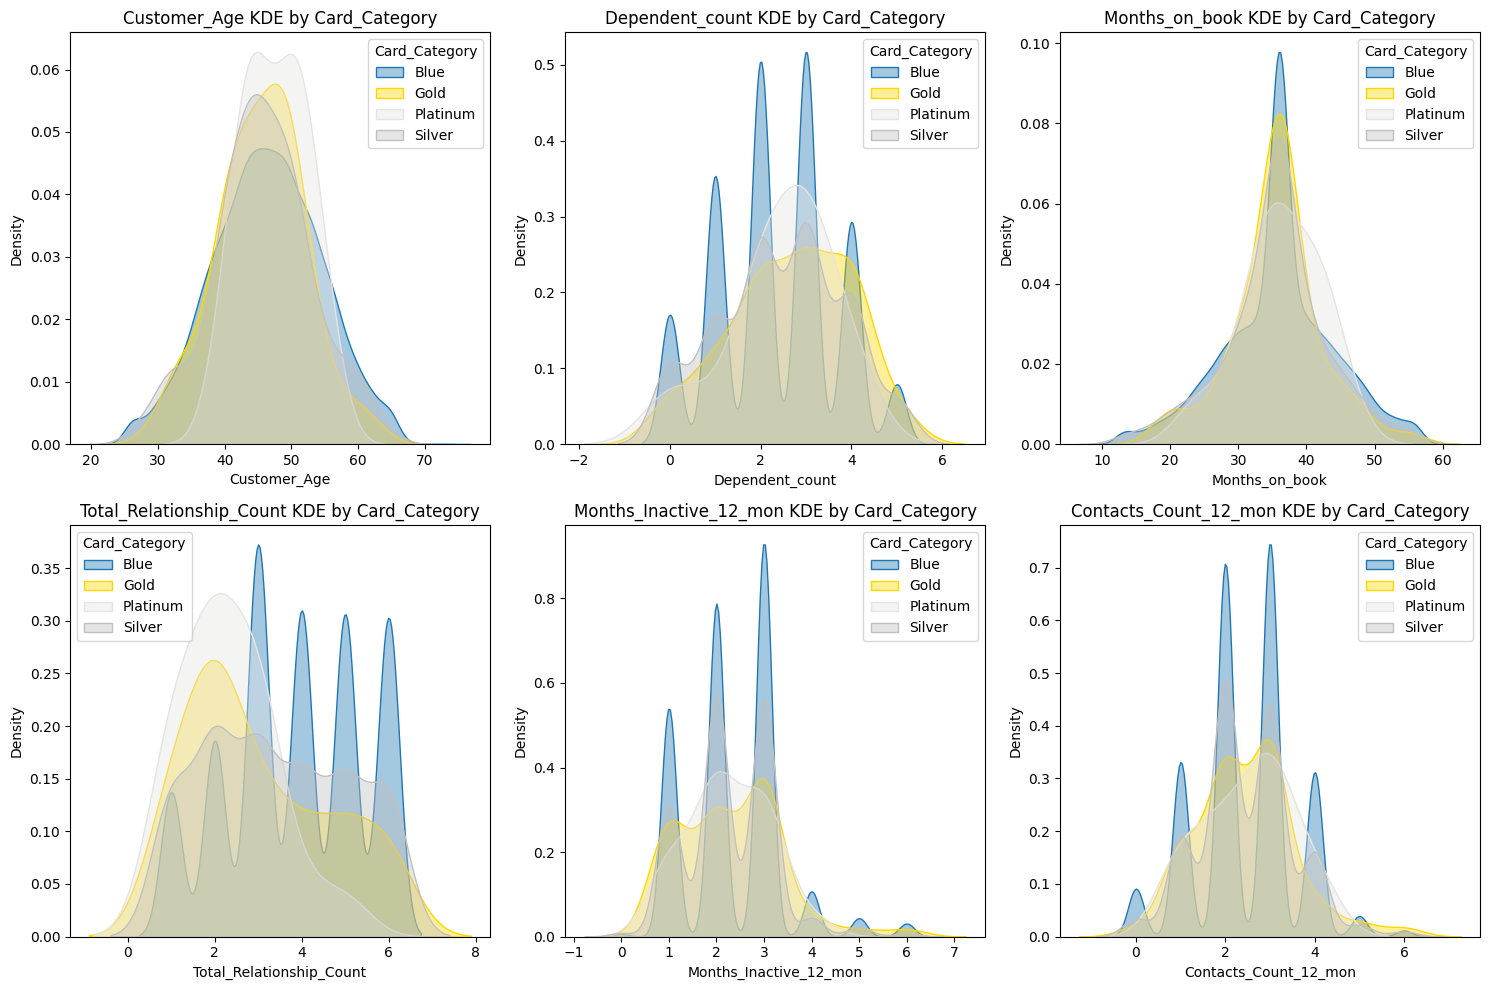

In [ ]:
custom_colors = ['#1f77b4', '#FFD700', '#E5E4E2', '#C0C0C0']  # blue, gold, platinum, silver
analysis_plots(df1, Numeric_Discrete, 'Numeric_Discrete', target_col='Card_Category', custom_colors=custom_colors)

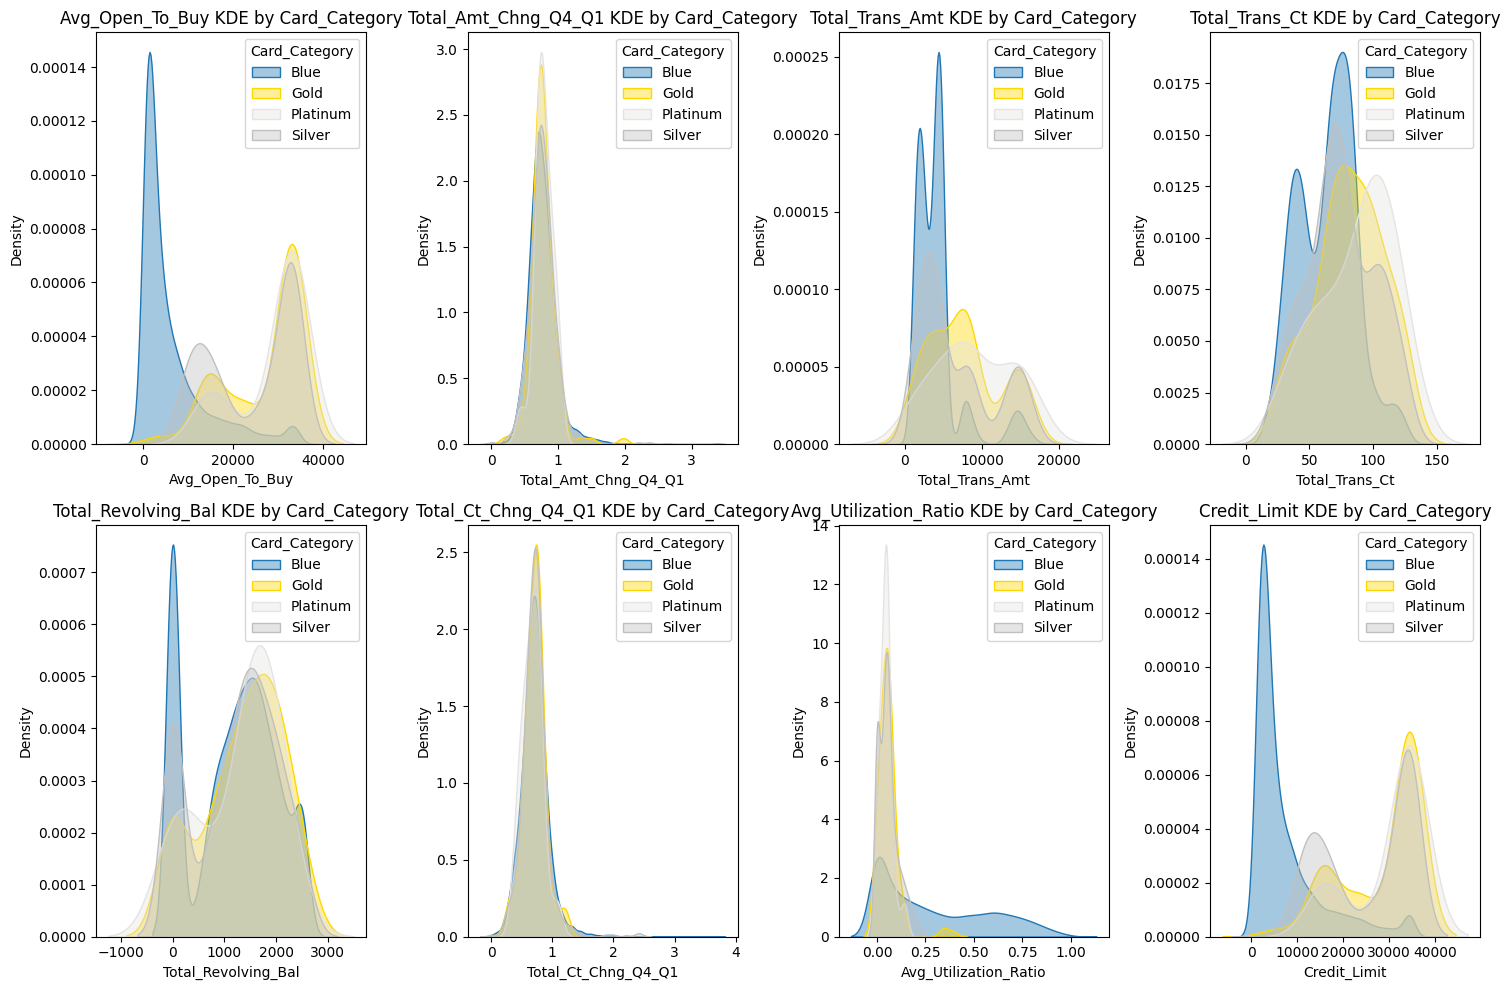

In [ ]:
custom_colors = ['#1f77b4', '#FFD700', '#E5E4E2', '#C0C0C0']  # blue, gold, platinum, silver
analysis_plots(df1, Numeric_Continuous, 'Numeric_Continuous', ncols=4 ,target_col='Card_Category', custom_colors=custom_colors)

## Numeric Discrete

### Total Relationship count
Increase people relatioships with bank by for all customers having less than 3 relatioships. By providing them with benefits for so. 

In [ ]:
df2 = df1.copy()
df2['Relationship Count>=3'] = df2.Total_Relationship_Count >= 3
relationship_churn = pd.crosstab(df2['Relationship Count>=3'], df2['churn_flag'])
relationship_churn['Churn Probability'] = relationship_churn[1] / (relationship_churn[0] + relationship_churn[1])
pd.DataFrame(relationship_churn['Churn Probability'])

Churn Probability
Relationship Count>=3                   
False                           0.268927
True                            0.131427

### Contact Counts
Minimizing contacts made by customer by improving on service given to customer..

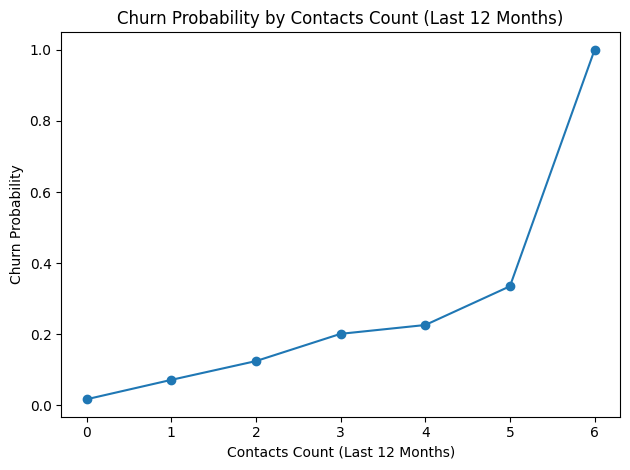

In [ ]:
contacts_churn = pd.crosstab(df2['Contacts_Count_12_mon'], df2['churn_flag'])
contacts_churn['Churn Probability'] = contacts_churn[1] / (contacts_churn[0] + contacts_churn[1])
contacts_churn['Churn Probability'].plot(marker='o')
plt.title('Churn Probability by Contacts Count (Last 12 Months)')
plt.xlabel('Contacts Count (Last 12 Months)')
plt.ylabel('Churn Probability')
plt.tight_layout()
plt.savefig('../object/Churn Probability by Contacts Count.png')
plt.show()

### Inactive Months
* Churn probability doubles if person is inactive more than 3 months.

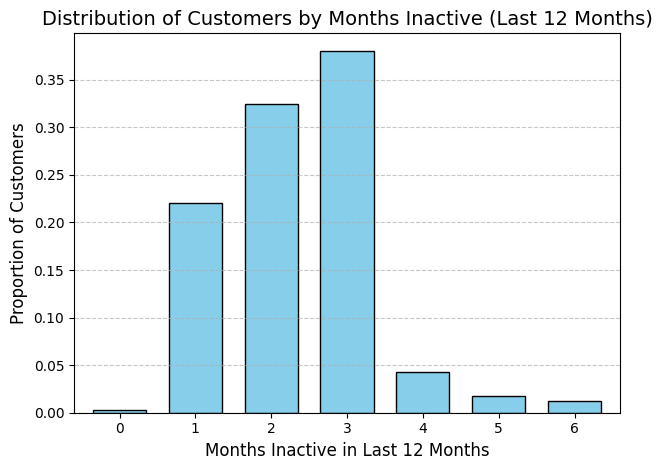

churn_flag                 0    1  Churn Probability       all
Months_Inactive_12_mon                                        
0                         14   15           0.517241  0.002864
1                       2133  100           0.044783  0.220500
2                       2777  505           0.153870  0.324084
3                       3020  826           0.214769  0.379777
4                        305  130           0.298851  0.042954
5                        146   32           0.179775  0.017577
6                        105   19           0.153226  0.012244

In [ ]:
inactive_churn = pd.crosstab(df1['Months_Inactive_12_mon'], df1['churn_flag'])
inactive_churn['Churn Probability'] = inactive_churn[1] / (inactive_churn[0] + inactive_churn[1])
inactive_churn['all']= inactive_churn[0] + inactive_churn[1]
inactive_churn['all'] = inactive_churn['all']/inactive_churn['all'].sum()
ax = inactive_churn['all'].plot(kind='bar', color='#87CEEB', edgecolor='black', width=0.7)
plt.title('Distribution of Customers by Months Inactive (Last 12 Months)', fontsize=14)
plt.xlabel('Months Inactive in Last 12 Months', fontsize=12)
plt.ylabel('Proportion of Customers', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('../object/Distribution of Customers by Months Inactive.png', bbox_inches='tight')
plt.tight_layout()
plt.show()

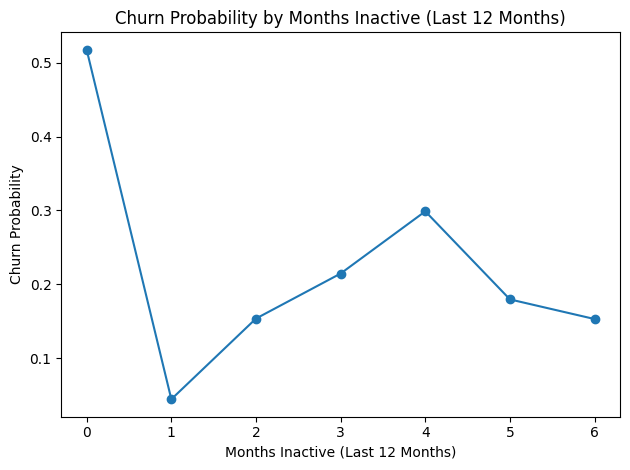

In [ ]:
inactive_churn['Churn Probability'].plot(marker='o')
plt.title('Churn Probability by Months Inactive (Last 12 Months)')
plt.xlabel('Months Inactive (Last 12 Months)')
plt.ylabel('Churn Probability')
plt.tight_layout()
plt.savefig('../object/Churn Probability by Months Inactive.png')
plt.show()

In [ ]:
df2 = df1.copy()
df2['inactive>=3'] = df2.Months_Inactive_12_mon >= 3
inactive_churn = pd.crosstab(df2['inactive>=3'], df2['churn_flag'])
inactive_churn['Churn Probability'] = inactive_churn[1] / (inactive_churn[0] + inactive_churn[1])
pd.DataFrame(inactive_churn['Churn Probability'])

Churn Probability
inactive>=3                   
False                 0.111833
True                  0.219725

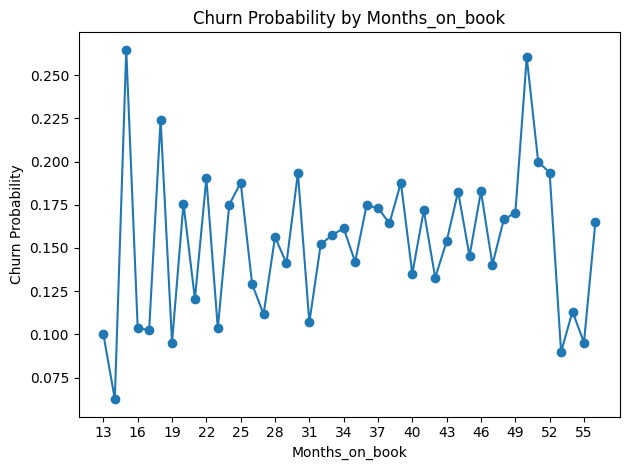

churn_flag         0    1  Churn Probability
Months_on_book                              
14                15    1           0.062500
53                71    7           0.089744
55                38    4           0.095238
19                57    6           0.095238
13                63    7           0.100000
17                35    4           0.102564
16                26    3           0.103448
23               104   12           0.103448
31               284   34           0.106918
27               183   23           0.111650
54                47    6           0.113208
21                73   10           0.120482
26               162   24           0.129032
42               235   36           0.132841
40               288   45           0.135135
47               147   24           0.140351
29               207   34           0.141079
35               272   45           0.141956
45               194   33           0.145374
32               245   44           0.152249
43               231   42           0.153846
28               232   43           0.156364
33               257   48           0.157377
34               296   57           0.161473
38               290   57           0.164265
56                86   17           0.165049
48               135   27           0.166667
49               117   24           0.170213
41               246   51           0.171717
37               296   62           0.173184
36              2033  430           0.174584
24               132   28           0.175000
20                61   13           0.175676
44               188   42           0.182609
46               161   36           0.182741
39               277   64           0.187683
25               134   31           0.187879
22                85   20           0.190476
30               242   58           0.193333
52                50   12           0.193548
51                64   16           0.200000
18                45   13           0.224138
50                71   25           0.260417
15                25    9           0.264706

In [ ]:
mob_churn = pd.crosstab(df2['Months_on_book'], df2['churn_flag'])
mob_churn['Churn Probability'] = mob_churn[1] / (mob_churn[0] + mob_churn[1])
mob_churn['Churn Probability'].plot(marker='o')
plt.title('Churn Probability by Months_on_book')
plt.xlabel('Months_on_book')
plt.ylabel('Churn Probability')
plt.xticks(ticks=np.arange(mob_churn.index.min(), mob_churn.index.max()+1, 3))
plt.tight_layout()
plt.show()

mob_churn.sort_values(by='Churn Probability')

In [ ]:
from scipy.stats import ttest_ind

# Separate customers who left (churned) and had 0 months inactive
anomaly_group = df2[(df2['churn_flag'] == 1) & (df2['Months_Inactive_12_mon'] == 0)]
# Compare with customers who churned but had >0 months inactive
non_anomaly_group = df2[(df2['churn_flag'] == 1) & (df2['Months_Inactive_12_mon'] > 0)]

# Hypothesis: The mean 'Months_on_book' for anomaly group is different from non-anomaly group
t_stat, p_val = ttest_ind(anomaly_group['Months_on_book'], non_anomaly_group['Months_on_book'], equal_var=False)

print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.5f}")
print(f"Mean Months_on_book (anomaly): {anomaly_group['Months_on_book'].mean():.2f}")
print(f"Mean Months_on_book (non-anomaly): {non_anomaly_group['Months_on_book'].mean():.2f}")

# Optional: Show group sizes
print(f"Anomaly group size: {len(anomaly_group)}, Non-anomaly group size: {len(non_anomaly_group)}")

T-statistic: 7.288, P-value: 0.00000
Mean Months_on_book (anomaly): 47.60
Mean Months_on_book (non-anomaly): 36.07
Anomaly group size: 15, Non-anomaly group size: 1612


## Numeric Continuous

### Total Transaction Amount, Total Transaction Count,Total Transaction Change Ratio Q4 to Q1,Total Revolving Balance, Average Utilization Ratio

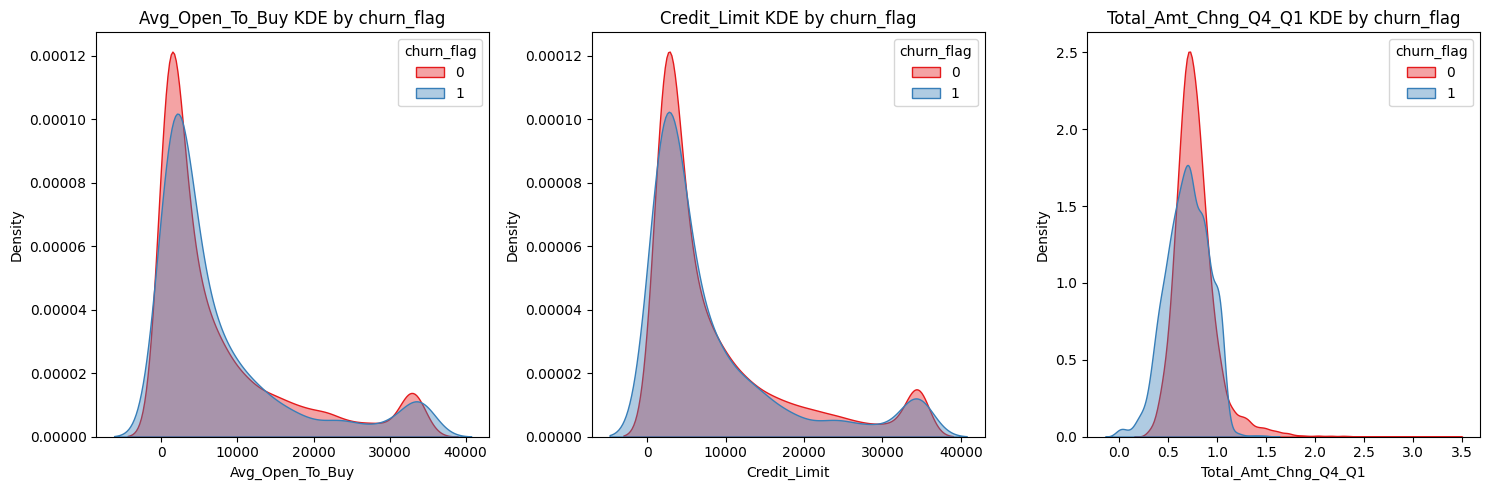

In [ ]:
analysis_plots(df1,
    [
    #     'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Total_Revolving_Bal'
    # , 'Avg_Utilization_Ratio',
    'Avg_Open_To_Buy', 'Credit_Limit', 'Total_Amt_Chng_Q4_Q1',
    # 'Total_Revolving_Bal', 'Avg_Utilization_Ratio'
    ],
    'Numeric_Continuous',
    target_col=target,
    ncols=3,save='../object/Numeric_Conti_b.png'
)

# Conculsions

---

## Gender 

- **Transaction Patterns:**  
    Total transaction count, amount, and average utilization ratio are higher for women, even though they are more likely to leave than men. This suggests that increasing the amount women can spend may help retention.

    <div>
        <style scoped>
            .dataframe tbody tr th:only-of-type {vertical-align: middle;}
            .dataframe tbody tr th {vertical-align: top;}
            .dataframe thead th {text-align: right;}
        </style>
        <table border="1" class="dataframe">
            <thead>
                <tr style="text-align: right;">
                    <th>Gender</th>
                    <th>Churn Probability</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <th>F</th>
                    <td>0.173572</td>
                </tr>
                <tr>
                    <th>M</th>
                    <td>0.146152</td>
                </tr>
            </tbody>
        </table>
    </div>

    ![Gender.png](../images/Gender.png)

- **Income & Card Type:**  
    Women are underrepresented in high-income categories, possibly explaining their use of lower-tier cards with lower credit limits. In the unknown income category, women are overrepresented, which also explains the higher number of women using platinum cards.

    <div style="display: flex; gap: 16px; width: 100%; align-items: flex-start;">
        <div style="flex: 1;">
            <img src="../images/gender_by_income_level.png" alt="Bar chart comparing the number of women and men in each income category. Women are underrepresented in higher income categories and overrepresented in the unknown income category. The chart is set against a plain background." style="width:100%;height:auto;display:block;object-fit:contain;"/>
        </div>
        <div style="flex: 1;">
            <img src="../images/gender_by_card_type.png" alt="Line chart showing the percentage of female customers by card type: Blue, Silver, Gold, and Platinum. Blue cards have the highest percentage of women, while Gold and Silver have lower percentages. The chart is set against a plain background." style="width:100%;height:auto;display:block;object-fit:contain;"/>
        </div>
        <div style="flex: 1;">
            <img src="../images/Platinum card by gender,income category.png" alt="Bar chart showing the distribution of Platinum card holders across gender and income categories. The chart highlights that women are underrepresented in higher income categories and overrepresented in the unknown income category among Platinum card holders." style="width:100%;height:auto;display:block;object-fit:contain;"/>
        </div>
    </div>

---

## Card Category

- **Premium Flag:**  
    Adding a feature `premium_flag` (1 for Gold/Platinum, 0 for others) is helpful, as these groupings show similar patterns for dependent counts, total relationships, inactivity, transaction count, and utilization ratio.
- **Utilization Ratio:**  
    Premium segments have much lower utilization ratios than non-premium, indicating less interest in card usage.
- **Incentives:**  
    Incentivizing premium segments to spend more is more beneficial than focusing on non-premium.
- **Performance:**  
    Platinum is the worst-performing card category, while Gold performs much better and needs more focus.

    ![Churn Probability across card category.png](<../images/Churn Probability across card category.png> "Line chart showing churn probability for each card category: Blue, Silver, Gold, and Platinum. The chart shows churn probability on the y-axis and card category on the x-axis. Churn probability is lowest for Silver, slightly higher for Blue, increases for Gold, and is highest for Platinum. The chart title reads Churn Probability across Card Category. The environment is a simple white background with labeled axes. The tone is analytical and neutral, focusing on data comparison.")

---

## Total Relationship Count

- **Recommendation:**  
    Increase the number of relationships with the bank for all customers having fewer than 3 relationships by providing targeted benefits.

    <div>
        <style scoped>
            .dataframe tbody tr th:only-of-type{vertical-align:middle;}
            .dataframe tbody tr th{vertical-align:top;}
            .dataframe thead th{text-align:right;}
        </style>
        <table border="1" class="dataframe">
            <thead>
                <tr style="text-align:right;">
                    <th>Relationship Count</th>
                    <th>Churn Probability</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <th>&lt;3</th>
                    <td>0.268927</td>
                </tr>
                <tr>
                    <th>&gt;=3</th>
                    <td>0.131427</td>
                </tr>
            </tbody>
        </table>
    </div>

---

## Contact Counts

- **Service Improvement:**  
    Minimize customer contacts by improving service quality.

    ![Churn Probability by Contacts Count.png](<../images/Churn Probability by Contacts Count.png>)

---

## Inactive Months

- **Churn Risk:**  
    Churn probability doubles if a person is inactive for more than 3 months.

    <div>
        <style scoped>
            .dataframe tbody tr th{vertical-align:top;}
            .dataframe thead th{text-align:right;}
        </style>
        <table border="1" class="dataframe" style="margin-left:0;text-align:left;">
            <thead>
                <tr>
                    <th>Inactive 3+ Months?</th>
                    <th>Churn Probability</th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td>No</td>
                    <td>0.1118</td>
                </tr>
                <tr>
                    <td>Yes</td>
                    <td>0.2197</td>
                </tr>
            </tbody>
        </table>
    </div>

- **Insights:**  
    - Customers not inactive even for a single month churned the most.
    - Almost 90% of customers were inactive between 1 to 3 months in the last 12 months.
    - Churn probability is higher in the 4th month, indicating a risk of higher churn next month. Prompt action is needed.

    ![Distribution of Customers by Months Inactive.png](<../images/Distribution of Customers by Months Inactive.png>)

    ![Churn Probability by Months Inactive.png](<../images/Churn Probability by Months Inactive.png>)

---

## Numeric Continuous Features

- **Strong Indicators:**  
    Total transaction amount, total transaction count, transaction count change ratio (Q4 to Q1), total revolving balance, and average utilization ratio show clear low-value clusters for attrited customers—strong churn indicators.

    ![Numeric_Conti_a.png](../images/Numeric_Conti_a.png)

- **Weak Indicators:**  
    Average open to buy, credit limit, and total transaction amount change (Q4 to Q1) are not strongly correlated with churn.

    ![Numeric_Conti_b.png](../images/Numeric_Conti_b.png)

- **Attrition Signal:**  
    Total revolving balance and average utilization ratio of churners are near zero—a strong indicator of attrition.

    ![Numeric_Conti_c.png](../images/Numeric_Conti_c.png)

**Precautions for Modelling Procedure**

- **Imbalanced Dataset:**  
    The number of attrited customers is much lower than existing customers (roughly 4:1). This imbalance can bias the model. Techniques like **SMOTE** or class weighting should be applied during training.

- **Card Category Distribution:**  
    Most customers have a Blue Card; higher card categories have very few members. This can affect the model’s ability to generalize for premium segments.

- **Unknown Categories:**  
    The "Unknown" category appears in **Income Category**, **Education Level**, and **Marital Status**. Consider how to handle these missing or ambiguous values (e.g., imputation, separate category). But in all 3 **Unknown Category** can't be dropped as it is 2nd or 3rd highest in churn probabaility in each case

- **Data Anomaly:**  
    A majority of people joined exactly 36 months ago, which is an anomaly in the data. Investigate or consider this during feature engineering.

- **Highly Correlated Features:**  
    **Avg. open to buy** is very similar to **Credit Limit** (perfect linear correlation). Keep only one of these features to avoid multicollinearity.

**Feature engineering ideas:**
* **Average transaction amount per transaction (`Avg_Trans_Amt`)**: Calculating `Total_Trans_Amt` divided by `Total_Trans_Ct` gives insight into spending behavior per transaction. This can help distinguish between customers who make frequent small purchases and those who make fewer, larger transactions, which may relate to churn risk.
    
* **Average revolving balance per month (`Monthly_Rev_Bal`)**: Dividing `Total_Revolving_Bal` by `Months_on_book` provides the average monthly revolving balance. This feature can indicate ongoing debt or credit usage patterns, which may be predictive of attrition.

* **Usage ratio (`Usage_Ratio`)**: Calculating `Total_Trans_Amt` divided by `Total_Revolving_Bal` gives the ratio of total transaction amount to total revolving balance. This feature can highlight customers who spend much more than they revolve, or vice versa, which may be indicative of churn risk.

* **Premium Card Feature (`Premium_Flag`):**  Creating a **premium flag** (1 for Gold/Platinum, 0 for others) is recommended. Gold and Platinum cards show similar patterns in dependent counts, total relationships, inactivity, transaction count, and utilization ratio.